.
# Making experiments

**Note on PsychoPy**

* In previous iterations of this lecture, we didn't cover Psychopy (cause it suucked, had years-old and long unsupported dependencies, could not easily be installed (nor could its depencencies), didn't run on Linux nor in Virtualbox, didn't support Python 3, swarmed with bugs, was hugely platform-dependent, ...)
* However, Psychopy is the most-used library for experiments (both at our University and globally)...
* In terms of [timing](https://psyarxiv.com/d6nu5/), Psychopy seems to be far superior to Expyriment
* In the last years, Psychopy started to not be awful anymore! 
    * They started active developement again (outdated intro-Video concerning PychoPy3: https://www.youtube.com/watch?v=bprYeBzkUc8&feature=emb_logo)
    * Python 3 compatibility: https://github.com/psychopy/psychopy/releases?after=3.0.0b4
    * Easy pip/conda-env install: https://www.psychopy.org/download.html#anaconda-and-miniconda
* This time, we include PsychoPy
    * Installation: Make sure to follow the instructions at https://www.psychopy.org/download.html#anaconda-and-miniconda (->install from conda-forge!)
        * On Linux this *may* be needed as well: https://discourse.psychopy.org/t/installing-and-running-psychopy-on-ubuntu-18-04-with-conda-python-3-6/5792 (not neccessary for me anymore)
    * Easy install to your `scientific_programming`-environment using `conda env update --name scientific_programming --file psychopy/psyenv.yml`
    * Original `environment.yml` updated as well

# The easy way

Psychopy contains two interfaces: the **[Builder](https://www.psychopy.org/builder/index.html)** and the **[Coder](https://www.psychopy.org/coder/index.html)**.

The Builder is made for non-coders. You create experiments with a drag'n'drop-interface, you run it from inside PsychoPy and then analyze your data in Excel...:

![](figures/psychopy_builder.png)

What you produce in the Builder-Interface produces Python-Code which could be tweaked afterwards:

In [8]:
with open('./psychopy/stroop/stroop.py', 'r') as file:
    for line in file.readlines():
        print(line, end='')

﻿#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
This experiment was created using PsychoPy3 Experiment Builder (v2020.1.2),
    on Wed 01 Jul 2020 02:54:40 PM CEST
If you publish work using this script the most relevant publication is:

    Peirce J, Gray JR, Simpson S, MacAskill M, Höchenberger R, Sogo H, Kastman E, Lindeløv JK. (2019) 
        PsychoPy2: Experiments in behavior made easy Behav Res 51: 195. 
        https://doi.org/10.3758/s13428-018-01193-y

"""

from __future__ import absolute_import, division

from psychopy import locale_setup
from psychopy import prefs
from psychopy import sound, gui, visual, core, data, event, logging, clock
from psychopy.constants import (NOT_STARTED, STARTED, PLAYING, PAUSED,
                                STOPPED, FINISHED, PRESSED, RELEASED, FOREVER)

import numpy as np  # whole numpy lib is available, prepend 'np.'
from numpy import (sin, cos, tan, log, log10, pi, average,
                   sqrt, std, deg2rad, rad2deg, linspace, asarray

In [19]:
!psychopy


(psychopy:14879): Gtk-WARNING **: 13:13:39.712: Unable to locate theme engine in module_path: "adwaita",

(psychopy:14879): Gtk-WARNING **: 13:13:39.715: Unable to locate theme engine in module_path: "adwaita",
01:13:40 PM: Debug: Adding duplicate image handler for 'Windows bitmap file'
01:13:40 PM: Debug: Adding duplicate image handler for 'Windows bitmap file'
01:13:40 PM: Debug: Adding duplicate image handler for 'Windows bitmap file'

** (psychopy:14879): WARNING **: 13:13:53.074: Invalid borders specified for theme pixmap:
        /usr/share/themes/Breeze/gtk-2.0/../assets/line-h.png,
borders don't fit within the image


Being avid coders, we will not look at the Builder-interface. We think that GUIs like this have a lack of flexibility & control, limiting the scope of experimental settings. 

If you want to see the coder in action, see this 15-minute-Intro: https://www.youtube.com/watch?v=VV6qhuQgsiI

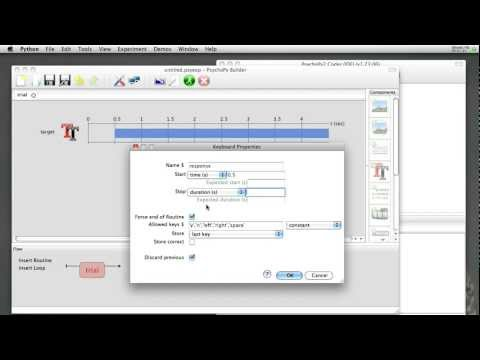

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("VV6qhuQgsiI")

# The coder-way

### Let's think about what we need to make our own experiment:

* Graphical User Interface
* Stimuli (Visual, auditory, ...)
* User Input


* Experiment Flow/Design
* Data logging
* (Serial) Port communication (for eg. EEG-markers)


We'll focus on the first three in the first part and afterwards on the latter ones:

## Graphical User Interfaces

There are quite a few libraries for experiments out there, and they all need some kind of Backend to present visual and auditory stimuly. Many of of them rely on **pyGame** for their visual stimuli, providing more functionality ontop of it (Expyriment does so, and Psychopy does so by default, even though it's [deprecated](https://www.psychopy.org/api/visual/window.html)). But even for those which don't, the principle of how to put stuff on a screen is equal most of the time anyways. 
(even though modern GUI-libraries generally make use of the Webbrowser (see eg https://towardsdatascience.com/building-a-simple-ui-for-python-fd0e5f2a2d8b), for experiments we need full control & timing we cannot achive in browsers.

Let's look into pygame to understand what's going on there:

In [1]:
import pygame
import time

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [24]:
pygame.init()

pygame.display.set_caption("minimal program")

# create a surface on screen that has the size of 240 x 180
screen = pygame.display.set_mode((240,180))

time.sleep(3)

pygame.quit() #only necessary if you run it in Jupyter

Pygame must at first be **initialized**, before we initialize some settings for the display. Among these the *display mode* is important -- it decides the size of the actual window pygame will open in.

In [1]:
#DO NOT RUN THIS CELL - When I do, I have to manually kill my machine!
assert False

# Creates a surface on screen that has the size of 240 x 180
screen = pygame.display.set_mode((240,180))

# Stretches this screen such that it's presented in full-screen mode.
pygame.display.toggle_fullscreen()

# Creates a true full-screen Window
modes = pygame.display.list_modes(0, pygame.FULLSCREEN)
screen=pygame.display.set_mode(modes[0], pygame.FULLSCREEN)

AssertionError: 

**Note that stretching a non-fullscreen-resolution-window to fullscreen may lead to side-effects, especially when using multiple displays!** - the reason I only have one screen right now: https://docs.expyriment.org/Problems.html#no-support-for-multiple-monitors

In [25]:
pygame.init()
pygame.display.list_modes(0, pygame.FULLSCREEN)[0]

(1920, 1080)

## The main loop

Note that GUIs must generally perform *active waiting*, which means they must stay constantly running loop to stay active and to not close. Letting a GUI *sleep* will make it stop responding - so if you have other stuff you want to run while the GUI is active, you have to make separate **Threads** (see next week), with the caviat that in basically all Python-GUI-libraris, the UI must additionally generally be in the main *Thread*. To communicate with it, you would use [queues](https://www.google.com/?q=python+gui+communication+queue), which we cannot cover this week.

This busy waiting however leads to the general structure of any game (or, for that matter, experiment): The main **game loop**

In [29]:
import os
os.chdir('./pygame')

FileNotFoundError: [Errno 2] No such file or directory: './pygame'

In [4]:
# %load pygame_1.py
import pygame

def main():

    pygame.init()

    # load and set the logo
    logo = pygame.image.load("logo32x32.jpg")
    pygame.display.set_icon(logo)
    pygame.display.set_caption("minimal program")

    # create a surface on screen that has the size of 240 x 180
    screen = pygame.display.set_mode((240,180))

    # define a variable to control the main loop
    running = True

    while running:
        # event handling, gets all event from the eventqueue
        for event in pygame.event.get():
            # only do something if the event is of type QUIT (meaning you click the [x] or press ALT-F4)
            if event.type == pygame.QUIT:
                # change the value to False, to exit the main loop
                running = False
                pygame.quit() #only necessary if you run it in Jupyter


if __name__=="__main__":
    main()


In [28]:
!python pygame_1.py

ALSA lib pcm_dmix.c:1090:(snd_pcm_dmix_open) unable to open slave


In [29]:
# %load pygame_1_fullscreen.py
import pygame

def main():

    pygame.init()

    # load and set the logo
    logo = pygame.image.load("logo32x32.jpg")
    pygame.display.set_icon(logo)
    pygame.display.set_caption("minimal program")

    # create a surface on screen that has the size of 240 x 180
    modes = pygame.display.list_modes(0, pygame.FULLSCREEN)
    screen=pygame.display.set_mode(modes[0], pygame.FULLSCREEN)
    
    
    # define a variable to control the main loop
    running = True

    while running:
        # event handling, gets all event from the eventqueue
        for event in pygame.event.get():
            
            if (event.type is pygame.KEYDOWN and event.key == pygame.K_f):
                if screen.get_flags() & pygame.FULLSCREEN:
                    pygame.display.set_mode(modes[0])
                else:
                    pygame.display.set_mode(modes[0], pygame.FULLSCREEN)
        
            # only do something if the event is of type QUIT (meaning you click the [x] or press ALT-F4)
            if event.type == pygame.QUIT or (event.type is pygame.KEYDOWN and event.key == pygame.K_ESCAPE):
                # change the value to False, to exit the main loop
                running = False
                pygame.quit() #only necessary if you run it in Jupyter


if __name__=="__main__":
    main()


In [27]:
!python pygame_1_fullscreen.py

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


## Stimuli

We cannot have an experiment without anything to show to the user. Let's look at how to present simple stimuli using pygame.   

Anything visual must first be created as it's own *surface*, before the function *blit()* is used to copy the contents from this surface to another surface. 

However, doing so only draws on the back buffer where all objects are drawn before they are shown. To actually update the screen from this back buffer, we need to *flip()* the display, which will swap front and back buffer, such that we see what we drew so far, and continue drawing in the background.

### Images

In [28]:
# %load pygame_2.py
import pygame
import time

def main():

    pygame.init()

    # load and set the logo
    logo = pygame.image.load("logo32x32.jpg")
    pygame.display.set_icon(logo)
    pygame.display.set_caption("minimal program")

    # create a surface on screen that has the size of 240 x 180
    screen = pygame.display.set_mode((240,180))

    image = pygame.image.load("image.jpg")
    screen.blit(image, dest=(50,50))
    pygame.display.flip()
    
    time.sleep(5)
    pygame.quit() 


if __name__ == "__main__":
    main()

In [30]:
!python pygame_2.py

ALSA lib pcm_dmix.c:1090:(snd_pcm_dmix_open) unable to open slave


### Text

Note that pygame accepts only absolute coordinates on the display. To set a text precisely where you want to have it, you may need to play around with the coordinates or go for relative coordinates yourself.

In [34]:
# %load pygame_3.py
import pygame
import time


BGCOLOR = (0, 0, 0)
SCREENSIZE = (800, 600)
FONTSIZE = SCREENSIZE[0]//20
FONTCOLOR = (255, 255, 255)

CENTER = 0
NEWLINECENTER = 1
BOTTOM = 3
TOP = 6


def get_position(screen, text_surface, where):
    text_width = text_surface.get_width()
    text_height = text_surface.get_height()
    width = screen.get_width()
    height = screen.get_height()
    if where == CENTER:
        return width/2-text_width/2, height/2-text_height/2
    elif where == NEWLINECENTER:
        return width/2-text_width/2, 5.0/8*height
    elif where == BOTTOM:
        return width/2-text_width/2, height-1.5*text_height
    elif where == TOP:
        return width/2-text_width/2, 1.0/10*height


def main():
    pygame.init()
    screen=pygame.display.set_mode(SCREENSIZE)

    screen.fill(BGCOLOR) #erase texts before
    font = pygame.font.Font(None, FONTSIZE)
    text_surface = font.render("Hello, World!", True, FONTCOLOR, BGCOLOR) #text, antialias, color, background
    posx, posy = get_position(screen, text_surface, TOP)
    screen.blit(text_surface, dest=(posx, posy))
    pygame.display.flip()

    time.sleep(5)
    pygame.quit()


if __name__ == "__main__":
    main()

In [31]:
!python pygame_3.py

ALSA lib pcm_dmix.c:1090:(snd_pcm_dmix_open) unable to open slave


### Moving stimuli

In [32]:
# %load pygame_4.py
import pygame
import time

killevent = lambda event: event.type == pygame.QUIT or (event.type is pygame.KEYDOWN and event.key == pygame.K_ESCAPE)

def main():

    pygame.init()

    # create a surface on screen that has the size of 240 x 180
    screen = pygame.display.set_mode((800, 600))

    image = pygame.image.load("smiley.jpg")
    image.set_colorkey((255,255,255)) #this color is now transparent

    xpos = 50
    ypos = 50
    step_x = 10
    step_y = 10


    while True:
        if xpos > screen.get_width()-image.get_width() or xpos <= 0: step_x *= -1
        if ypos > screen.get_height()-image.get_height() or ypos <= 0: step_y *= -1
        xpos += step_x 
        ypos += step_y
        screen.fill((0,0,0))
        screen.blit(image, (xpos, ypos))
        pygame.display.flip()
        time.sleep(0.01)
        if any(killevent(event) for event in pygame.event.get()):
            break
            
    pygame.quit()


if __name__ == "__main__":
    main()


In [38]:
!python pygame_4.py

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In fact, if you wanted high performance, you'd work with so-called *dirty rectangles*, allowing you to only update part of the screen instead of flipping the entire screen (see eg. https://dr0id.bitbucket.io/legacy/pygame_tutorial01.html)

### Sounds

In [30]:
import pygame 

pygame.mixer.pre_init(44100, 16, 2, 4096) #frequency, size, channels, buffersize
pygame.init()
effect = pygame.mixer.Sound('beep.wav')
effect.play()

## User Input

User Input is also an *event*, just like pressing the [x] at the top-right corner. More precisely, a keypress is an event of type pygame.KEYDOWN. That means, if we encounter an event of such a type, we can check for which key it is.  
For a list of all pyGame-keys, have a look at https://www.pygame.org/docs/ref/key.html.

In [44]:
def wait_any_key():
    while True:
        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_ESCAPE:
                    return False
                else:
                    return event.key  #returns key numbers
            elif event.type == pygame.QUIT:
                return False


def wait_key(which):
    while True:
        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_ESCAPE:
                    return False
                elif event.key == which:
                    return True
            elif event.type == pygame.QUIT:
                return False

As the ```wait_any_key()``` and ```wait_key()```-functions are what's left from the *game loop* of the previous examples, namely the parts where the process is *actively waiting*, they are responsible for allowing the user to quit. If [ESC] or [x] is pressed, these functions return ```false```, signalling the caller that the process should be terminated.

## Putting it together

Let's use what we know so far to make a sample 'Experiment': The subject is supposed to press [left] for even numbers, and [right] for odd numbers. As we only looked at the GUI so far, we don't measure response times or save the results somehow, but simply play a sound when the subject was wrong.

In [51]:
with open('./pygame_5.py', 'r') as file:
    for line in file.readlines():
        print(line, end='')

import pygame
import time
import random


BGCOLOR = (0, 0, 0)
SCREENSIZE = (800, 600)
FONTSIZE = SCREENSIZE[0]//20
FONTCOLOR = (255, 255, 255)

CENTER = 0
NEWLINECENTER = 1
BOTTOM = 3
TOP = 6


def get_position(screen, text_surface, where):
    text_width = text_surface.get_width()
    text_height = text_surface.get_height()
    width = screen.get_width()
    height = screen.get_height()
    if where == CENTER:
        return width/2-text_width/2, height/2-text_height/2
    elif where == NEWLINECENTER:
        return width/2-text_width/2, 5.0/8*height
    elif where == BOTTOM:
        return width/2-text_width/2, height-1.5*text_height
    elif where == TOP:
        return width/2-text_width/2, 1.0/10*height


def wait_any_key():
    while True:
        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_ESCAPE:
                    return False
                else:
                    return event.key  #returns key num

In [4]:
!python pygame_5.py

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
ALSA lib pcm_dmix.c:1090:(snd_pcm_dmix_open) unable to open slave
Traceback (most recent call last):
  File "pygame_5.py", line 107, in <module>
    main()
  File "pygame_5.py", line 77, in main
    effect = pygame.mixer.Sound('beep.wav')
pygame.error: mixer not initialized


# PsychoPy

After this intro to GUIs, let's look at how Psychopy does the same things.

PsychoPy is an all-in-one solution, and as such it is responsible for
* Stimulus presentation
* Recording of input/output events
* Communication with other devices
* Collection and preprocessing of data
* Experiment design

For now, we'll only look at the GUI-Elements and, of course, we'll ignore the Builder-interface.

Note that Psychopy comes with it's own IDE, which has further settings for example for the screen, contains an experiment runner, syncing for online-experiments etc:

In [11]:
!psychopy


(psychopy:10715): Gtk-WARNING **: 14:01:53.259: Unable to locate theme engine in module_path: "adwaita",

(psychopy:10715): Gtk-WARNING **: 14:01:53.262: Unable to locate theme engine in module_path: "adwaita",
02:01:53 PM: Debug: Adding duplicate image handler for 'Windows bitmap file'
02:01:53 PM: Debug: Adding duplicate image handler for 'Windows bitmap file'
02:01:53 PM: Debug: Adding duplicate image handler for 'Windows bitmap file'


We will, however, look at it in our favourite IDE, Jupyter Lab

In [6]:
import os
os.chdir('../psychopy')

## Stimuli

We’ll start out by adding a fixation point in the middle of the screen

In [ ]:
#Do not start any Psychopy code from inside Jupyter, you won't be able to close the appearing windows otherwise!

In [ ]:
# %load psychopy_1.py
assert '__file__' in locals() #to make sure to not run this inside Jupyter

from time import sleep
from psychopy import visual
# create window of size 800x600px on a monitor object we'll call testMonitor and with yellow color
mywin = visual.Window(size=[800,600], monitor="testMonitor", units="norm", color=[255,255,0])

# the scaling unit for object sizes and locations is normalized between -1 and 1
# create grating simulus on our window, size 0.015, center position, spatial frequency 0
# (grating stimulus is otherwise striped), pitch black (-1) color
fixation = visual.GratingStim(win=mywin, size=0.015, pos=[0,0], sf=0, color=-1)
grating = visual.GratingStim(win=mywin, mask="circle", size=0.2, pos=[-0.8,0], sf=3)

sleep(5)

In [14]:
!python psychopy_1.py

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


As Psychopy bases on pyGame (or other GUI-libraries, as it's backend can be changed!), the concept of front- and back-buffer exists as well, which is why we didn't see anything before:

In [66]:
# %load psychopy_2.py
assert '__file__' in locals() #to make sure to not run this inside Jupyter

from psychopy import visual, event
from time import sleep

mywin = visual.Window(size=[800,600], monitor="testMonitor", units="norm", color=[255,255,0])

fixation = visual.GratingStim(win=mywin, size=0.015, pos=[0,0], sf=0, color=-1)
grating = visual.GratingStim(win=mywin, mask="circle", size=0.2, pos=[-0.8,0], sf=3)

#without these, the stimulus is not drawn
fixation.draw()
grating.draw()

#also in psychopy, we draw onto the back buffer, and have to *flip* front and back buffer for the stimuli to be shown 
mywin.flip()

sleep(5)

In [7]:
!python psychopy_2.py

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


## User Input

There are two ways to get input from the user - the `waitKeys()`-function, which works similar to our `wait_key` or `wait_any_key` from before, as well as the concept of **Global Keys** - which can be used to execute a function whenever they are pressed

In [67]:
# %load psychopy_3.py
assert '__file__' in locals() #to make sure to not run this inside Jupyter

from psychopy import visual, event, core

mywin = visual.Window(size=[800,600], monitor="testMonitor", units="norm", color=[255,255,0])

fixation = visual.GratingStim(win=mywin, size=0.015, pos=[0,0], sf=0, color=-1)
grating = visual.GratingStim(win=mywin, mask="circle", size=0.2, pos=[-0.8,0], sf=3)

#global keys kan be pressed at any time during the experiment to executed the specified function
event.globalKeys.add(key='escape', func=core.quit)

fixation.draw()
grating.draw()
mywin.flip()

#without arguments, this waits for any keypress - alternatively, you could specify which keys to look for
event.waitKeys()
mywin.flip()

event.waitKeys()

In [17]:
!python psychopy_3.py

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# Expyriment

I personally prefer **Expyriment** over PsychoPy, as it runs smoother and provides better compability, while being almost equally powerful. 

It is a pure programming library (providing no GUI), is leightweight, entirely written in python, and has almost no dependencies.

Expyriment builds on top of Pygame as its backend, and has a similar way of initializing a GUI, presenting stimuli, and working with user input. It further gives the possibility to explicitly define experimental designs, automatically saves everything necessary, provides useful functions like a timer (with caveats, see later!), and wraps the entire framework into a pre-provided control structure.  



Expyriment is an all-in-one solution, and as such it is responsible for
* Stimulus presentation
* Recording of input/output events
* Communication with other devices
* Collection and preprocessing of data
* Experiment design

![](figures/Expyriment.png)

Figure source: Krause, F. & Lindemann, O. (2014). Expyriment: A Python library for cognitive and neuroscientific experiments. Behavior Research Methods, 46(2), 416-428. doi:10.3758/s13428-013-0390-6.

All of Expyriment's modules can be used independently of each other - the structure for experimental designs is independend of the presentation software actually used, such that you can use other software for presentation of stimuli, or experimental control, ... 

## Experiment Control

Every Expyriment-experiment adheres to the main control structure, as specified by the ```control```-package.

The control-package provides access to an experiment screen, keyboard, log file, clock and device communication.

Expyriment has three Landmarks for an experiment: initialize(), start(), and end(). 
* Initialize() starts up the screen (exp.screen), a keyboard (exp.keyboard), an event log file logging stimulus presentation times & device communications, (exp.events), and an experimental clock (exp.clock)
* Start() asks for a subject ID (saved as exp.subject) and creates a data file object (exp.data)
* Between start() and end() you iterate your hierachical design (experiment $\rightarrow$ blocks $\rightarrow$ trials)
* End() ends an experiment and saves tha data and log files

In [31]:
import os
os.chdir('../expyriment')

In [ ]:
# Expyriment can run inside Jupyter - when you run it the first time, it asks you if it's supposed to run in Window Mode, useful for debugging

In [62]:
from expyriment import design, control
from time import sleep

# create experiment object
exp = design.Experiment(name="My Experiment")

# initialize experiment object and make it active experimentka
# this will show a startup screen
# it will also initialize exp.screen, exp.mouse, exp.keyboard, exp.event and exp.clock
control.initialize(exp)

sleep(2)
# this will present a subject number screen and a ready screen after initialization
# is completely finished
control.start()

sleep(2)
                        
# this will show an "ending experiment" screen and save data
control.end()

Standard output and error logging is switched off under IPython.


True

While an interactive kernel like Jupyter asks us for the mode, in a normal script you'd always be fullscreen - as long as you don't specify otherwise. The develop-mode is always in window-mode, doesn't ask for a subject-ID, and initializes faster:

In [64]:
from expyriment import design, control
from time import sleep

exp = design.Experiment(name="My Experiment")
control.set_develop_mode(True)

control.initialize(exp)
sleep(2)
control.start()
control.end()

*** DEVELOP MODE ***
Standard output and error logging is switched off under IPython.


True

## Stimuli

Expyriment contains classes for visual and auditory stimuli. 

Unlike Pygame, you don't need to flip the buffer for the stimuli to be actually shown on the screen. This is because of Expyriment's present-function:  
```present(clear=True, update=True, log_event_tag=None)```  
where ```clear``` clears the buffers before drawing, and ```update``` flips the buffer after drawing.

Furthermore, you can (and should) preload the stimuli, such that they are fully loaded upon presentation - otherwise you'll mess up the timing of the experiment.

To show a few different stimuli in Expyriment without having to write the usual control-landmarks, let's make a context manager for the control *(Please don't do that when actually working with it, this is only for presentation!)*:

In [65]:
from expyriment import design, control, stimuli, misc
control.set_develop_mode(True)

class StimuliDemo:
    
    def __init__(self, name):
        exp = design.Experiment(name=name)
        control.initialize(exp)
        self.exp = exp

    def __enter__(self):
        control.start()
        return self.exp

    def __exit__(self, *args):
        control.end()

*** DEVELOP MODE ***


### Text

In [67]:
with StimuliDemo("Experiment") as exp:
    target = stimuli.TextLine(text="I am a text!", text_size=80)
    stimuli.FixCross().present()
    target.preload()
    exp.clock.wait(1000)
    target.present()
    exp.clock.wait(1000)

Standard output and error logging is switched off under IPython.


### Sounds

In [68]:
with StimuliDemo("Experiment") as exp:
    stimuli.Tone(duration=200, frequency=2000).play()
    exp.clock.wait(1000)

Standard output and error logging is switched off under IPython.


### Objects

In [69]:
with StimuliDemo("Experiment") as exp: 
    target = stimuli.Rectangle([50, 50], position=[20, 20], colour=misc.constants.C_RED)
    #target.preload()
    target.present()
    exp.clock.wait(1000)

Standard output and error logging is switched off under IPython.


### Multiple objects
If we want to draw multiple objects on the same buffer, we must 
* Clear the screen for the first object, without flipping buffers
* Don't clear the screen and don't flip buffers for objects in between
* Don't clear the screen, but flip buffers, for the last object

In [70]:
with StimuliDemo("Experiment") as exp: 
    stim1 = stimuli.Circle(radius=25, colour=(255, 255, 255), position=[-100,0])
    stim2 = stimuli.Circle(radius=25, colour=(255, 255, 255), position=[100,0])
    stim1.present(clear=True, update=False)
    stim2.present(clear=False, update=True)
    exp.clock.wait(3000)

Standard output and error logging is switched off under IPython.


### Complex objects

In [72]:
with StimuliDemo("Experiment") as exp:    
    button = stimuli.Rectangle(size=(40,20), position=(exp.screen.size[0]//2-25, 15-exp.screen.size[1]//2))
    button_text = stimuli.TextLine(text="ok", position=button.position, text_colour=misc.constants.C_WHITE)
    canvas = stimuli.BlankScreen()
    button.plot(canvas)
    button_text.plot(canvas)
    canvas.present()
    exp.clock.wait(5000)

Standard output and error logging is switched off under IPython.


Again, we see that we cannot click the button, because sleeping simply *blocks* the view, unlike an *active waiting loop* would do.

## Defaults

Expyriment works with a defaults-system for all its values (font, background-color, ...). Every package of Expyriment contains a ```defaults```-object, where these values can be overwritten.

https://docs.expyriment.org/expyriment.stimuli.defaults.html, 
https://docs.expyriment.org/expyriment.control.defaults.html

In [73]:
from expyriment import design, control, stimuli
from time import sleep
control.set_develop_mode(False)

control.defaults.window_mode = True # True corresponds to windowed
control.defaults.window_size = [800,600] # 800x600 resolution
# we are going to change the default background color for this experiment
# however this can also be changed later after initialization using exp.screen.colour()

design.defaults.experiment_background_colour = (230,230,70)

exp = design.Experiment(name="Cool Experiment")
control.initialize(exp)
control.start()
stimuli.FixCross().present()
exp.clock.wait(1000)
control.end()

*** NORMAL MODE ***
Standard output and error logging is switched off under IPython.


True

In [74]:
from expyriment import design, control, stimuli, misc
control.set_develop_mode(True)
used_exp_names = []

class StimuliDemo:
    
    def get_name(self, name):
        global used_exp_names
        used_name = name; i = 0
        while used_name in used_exp_names:
            used_name = name+str(i)
            i += 1
        used_exp_names.append(used_name)
        return used_name
    
    def __init__(self, name):
        exp = design.Experiment(name=self.get_name(name))
        control.initialize(exp)
        self.exp = exp

    def __enter__(self):
        control.start()
        return self.exp

    def __exit__(self, *args):
        control.end()

*** DEVELOP MODE ***


## User Input

Expyriment's IO module is for logging as well as user-input. It can also be used independently from other packages, to get eg. mouse presses or serial port communication.

### Keyboard.wait()

As mentioned above, every initialized experiment has access to the keyboard-object, which contains the method wait():  
```wait(keys=None, duration=None, wait_for_keyup=False, callback_function=None, process_control_events=True)```

As arguments, you can specify which keys to look for, if you want to wait for a key-release, you can specify a callback-function upon clicking, and you can set a timeout until its's no longer waited for the keypress.

The result is a tuple of (clicked character, reaction-time in ms)

In [76]:
with StimuliDemo("Experiment") as exp:  
    target = stimuli.TextLine(text="Any key to continue.", text_size=60)
    target.present()
    button, time = exp.keyboard.wait()

print(button)  
print(time)
print(button == misc.constants.K_BACKSPACE)

Standard output and error logging is switched off under IPython.
8
1236
True


![](figures/ascii_table.png)

All key- and color-constants can be found in Expyriment's documentation: https://docs.expyriment.org/expyriment.misc.constants.html

### Mouse input:

In [78]:
with StimuliDemo("Experiment") as exp:  
    while True:
        exp.mouse.show_cursor()  
        button = stimuli.Rectangle(size=(50,20), position=(exp.screen.size[0]//2-35, 15-exp.screen.size[1]//2))
        button_text = stimuli.TextLine(text="close", position=button.position, text_colour=misc.constants.C_WHITE)
        canvas = stimuli.BlankScreen()
        button.plot(canvas)
        
        button_text.plot(canvas)
        canvas.present()
        bid, pos, _rt = exp.mouse.wait_press()
        if bid == 0 and button.overlapping_with_position(pos):
            break

Standard output and error logging is switched off under IPython.


# Experiment Design

Everybody who already participated in an experiment should be familiar with the basic structure of an experiment -- Some stimulus is shown in a multitude of similar or equal versions in a random order, sometimes mixed with distractors. Each display of a stimulus is a *trial*. Often, experiments are split up into multiple *blocks*, showing for example different versions of the stimuli.  
 
The general order is thus:

* There is an experiment (what's returned by ```design.experiment()```)
  * The experiments consist of blocks
    * Every block consists of trials
      * (The trials probably contain one or more stimuli)

In [97]:
import os
os.chdir('../expyriment')

**Wiki**: 

*In psychology, the Simon effect is the finding that the difference in accuracy or reaction time between trials in which stimulus and response are on the same side and trials in which they are on opposite sides, with responses being generally slower and less accurate when the stimulus and response are on opposite sides. It is named for J. R. Simon who first published the effect in the late 1960s. Simon's original explanation for the effect was that there is an innate tendency to respond toward the source of stimulation. *

In [98]:
%run simon_task_short

*** DEVELOP MODE ***
Standard output and error logging is switched off under IPython.


## Expyriment's Design-package
* Contains classes describing experimental structures $\Rightarrow$ Hierachy between experiment, exp. blocks. exp. trials
* Allows for between-subject-factors, that are different dependent on the subject-ID
* Can export everything to be used by other packages (including PsychoPy!), can thus be used stand-alone

The design of an experiment is specified before calling ```control.start()```, such that in the actual experiment, it is enough to loop over all ```blocks``` and ```trials```, loading and presenting the stimuli from the trials:

In [99]:
# %load open_debugger/blocks_1.py
from expyriment import design, control, stimuli, misc, io

control.set_develop_mode(True)

exp = design.Experiment(name="My Experiment")
control.initialize(exp)

for name, color in [["green", misc.constants.C_GREEN], ["red", misc.constants.C_RED]]:
    block = design.Block(name=name.capitalize() + " Stimuli")
    block.set_factor("Color", name)
    for where in [["left", -300], ["right", 300]]:
        t = design.Trial()
        t.set_factor("Position", where[0])
        s = stimuli.Rectangle([50, 50], position=[where[1], 0], colour=color)
        t.add_stimulus(s)
        block.add_trial(t)
    exp.add_block(block)

control.start()

for block in exp.blocks:
    for trial in block.trials:
        trial.stimuli[0].present()
        exp.clock.wait(1000)

control.end()

*** DEVELOP MODE ***
Standard output and error logging is switched off under IPython.


True

Blocks and Trials can have ```Factors```. A factor is a simple key-value-pair, that can be used to store information about a Block or Trial, such that you can restore this information throughout the experiment, and use it to display custom things and to log conditions of blocks and trials.

In [100]:
from expyriment import design, control, stimuli, misc, io
control.set_develop_mode(True)
from time import sleep

exp = design.Experiment(name="My Experiment")
control.initialize(exp)

blankscreen = stimuli.BlankScreen(colour=(0,0,0))
blankscreen.preload()

block1 = design.Block(name="Block1")
block1.set_factor("Color", "green")
trial = design.Trial()
stimulus = stimuli.Circle(50, colour = misc.constants.C_GREEN)
trial.add_stimulus(stimulus)
block1.add_trial(trial, copies = 2)
exp.add_block(block1)

block2 = design.Block(name="Block2")
block2.set_factor("Color", "red")
trial = design.Trial()
stimulus = stimuli.Circle(50, colour = misc.constants.C_RED)
trial.add_stimulus(stimulus)
block2.add_trial(trial, copies = 2)
exp.add_block(block2)

control.start()
                        
for block in exp.blocks:
    print("Now we're printing", block.get_factor("Color"), "Circles.")
    for trial in block.trials:
        trial.stimuli[0].present()
        exp.clock.wait(500)
        blankscreen.present()
        exp.clock.wait(500)
        
        
control.end()

*** DEVELOP MODE ***
Standard output and error logging is switched off under IPython.
Now we're printing green Circles.
Now we're printing red Circles.


True

Of course, you'd normally set blocks and trials algorithmically in a loop.

In [83]:
from expyriment import design, control, stimuli, misc, io
control.set_develop_mode(True)

exp = design.Experiment(name="My Experiment")
control.initialize(exp)

for name, color in [["green", misc.constants.C_GREEN], ["red", misc.constants.C_RED]]:
    block = design.Block(name=name.capitalize()+" Stimuli")
    block.set_factor("Color", name)
    for where in [["left", -300], ["right", 300]]:
        t = design.Trial()
        t.set_factor("Position", where[0])
        s = stimuli.Rectangle([50, 50], position=[where[1], 0], colour=color)
        t.add_stimulus(s)
        block.add_trial(t)   
    exp.add_block(block)
        
control.start()
                        
for block in exp.blocks:
    for trial in block.trials:
        trial.stimuli[0].present()
        exp.clock.wait(1000)
        
        
control.end()

*** DEVELOP MODE ***
Standard output and error logging is switched off under IPython.


True

Blocks also provide the possibility to shuffle trials with it's method ```shuffle_trials(method=0, max_repetitions=None, n_segments=None)```. Note that this method even allows a possibility to not repeat too many equal trials inside a block! More on that in the appendix.

You can use the design-package alone and export the designs for other libraries:

In [101]:
from expyriment import design, control, stimuli, misc, io

exp = design.Experiment('Example experiment')
block1 = design.Block('Experimental block')
for cond in ['A', 'B', 'C']:
    trial = design.Trial()
    trial.set_factor('Condition', cond)
    block1.add_trial(trial, copies=5)
block2 = block1.copy()
block1.shuffle_trials()
block2.shuffle_trials()
exp.add_block(block1)
exp.add_block(block2)

exp.save_design('demodesign.csv')

Note that we didn't add any stimuli here. Unfortunately, Expyriment does not allow to save stimuli to a csv.

In [ ]:
%cat demodesign.csv

In [102]:
import pandas as pd
pd.read_csv('demodesign.csv', comment='#').head(16)

,block_cnt,block_id,trial_cnt,trial_id,Condition
0,0,0,0,14,C
1,0,0,1,11,C
2,0,0,2,8,B
3,0,0,3,13,C
4,0,0,4,9,B
5,0,0,5,2,A
6,0,0,6,0,A
7,0,0,7,10,C
8,0,0,8,7,B
9,0,0,9,5,B


### Between-Subject-Factors

In many studies, it is necessary to provide different stimuli for different subjects. Keep in mind however that doing so is a major design choice which requires far more experimental subjects to be statistically significant and comes with many other caveats.

In Expyriment, this are simply factors that are supposed to be different <b>B</b>et<b>W</b>een <b>S</b>ubjects. Expyriment allows to differ between subjects, based on their subject-ID: The between-subjects-factor is coupled to the subject ID that was assigned when the experiment was started.

**The Study**  

...is one I had to do as HiWi a couple of years ago. It is a linguistic experiment, in which reading times are measured and after a few sentences a control-question (to test if the participant actually read the sentences) must be answered.

*Liu, Mingya. (in preparation). ‘The wenn/falls Contrast in German: with experimental evidence‘*

The study tests if german native speakers interpret the conditional "falls" different than "wenn", with the hypothesis that a "wenn" is interpreted as biconditional ($P \leftrightarrow Q$) meaning that the condition where neither antecedent nor consequent are True is valid, but the condition where antecedent is True and consequence False isn't), whereas a "falls" is interpreted as material implication (for which it holds that $P\rightarrow Q \Leftrightarrow \lnot P \vee Q$).

For that, the subject is shown seven sentences, in which either the **wenn** or the **falls**-condition is presented, followed by a statement as for example $P \wedge \lnot Q$. The response time for this sentence is measured, with the assumption that the conditions which do not correspond to valid formulas in Propositional Logic have longer reading times. Which conditions are shown for which sentences is different from subject to subject.

In this (downscaled) version, we have a 2x2 Design:
* For every trial, you either get the **Falls** or the **Wenn** condition..
    * And there's either the $P \wedge Q$ ("gabgab") or the $P \wedge \lnot Q$ ("gabgabnicht") - condition.

In [103]:
import pandas as pd

def load_df(name):
    df = pd.read_csv(name, sep=';', skip_blank_lines=True, index_col='Index', dtype={'Index': 'Int32', 'Item': 'Int8', 'Condition': 'Int8', 'List_Num': 'Int8'})
    df['is_pract'] = df['is_pract'].astype('bool')
    df = df.dropna(subset=['Exp'])
    return df

load_df("bws_study.csv").head(8)

,Exp,Item,is_pract,Condition,S1,S2,S3,S4,S5,S6,S7,Answer,List_Num
Index,,,,,,,,,,,,,
1,MMT,1,True,1,Dennis kaufte einen Blumenstrauß für seine Fre...,Die Blumenladenverkäuferin hat ihm gesagt:,"Wenn es Narzissen gibt, gibt es Rosen.","Als Dennis sich umschaute, stellte er fest:",Es gab Narzissen und es gab Rosen.,Dennis ließ sich einen wunderschönen Strauß zu...,Hat Dennis Schokolade gekauft?,Nein,1
2,MMT,1,True,2,Dennis kaufte einen Blumenstrauß für seine Fre...,Die Blumenladenverkäuferin hat ihm gesagt:,"Falls es Narzissen gibt, gibt es Rosen.","Als Dennis sich umschaute, stellte er fest:",Es gab Narzissen und es gab Rosen.,Dennis ließ sich einen wunderschönen Strauß zu...,Hat Dennis Schokolade gekauft?,Nein,2
5,MMT,1,True,5,Dennis kaufte einen Blumenstrauß für seine Fre...,Die Blumenladenverkäuferin hat ihm gesagt:,"Wenn es Narzissen gibt, gibt es Rosen.","Als Dennis sich umschaute, stellte er fest:",Es gab keine Narzissen und es gab Rosen.,Dennis ließ sich einen wunderschönen Strauß zu...,Hat Dennis Schokolade gekauft?,Nein,5
6,MMT,1,True,6,Dennis kaufte einen Blumenstrauß für seine Fre...,Die Blumenladenverkäuferin hat ihm gesagt:,"Falls es Narzissen gibt, gibt es Rosen.","Als Dennis sich umschaute, stellte er fest:",Es gab keine Narzissen und es gab Rosen.,Dennis ließ sich einen wunderschönen Strauß zu...,Hat Dennis Schokolade gekauft?,Nein,6
10,MMT,2,True,1,Tim war auf dem Weg zur Drogerie.,Er bekam unterwegs noch eine SMS:,"Wenn es Toilettenpapier gibt, gibt es Seife.","Als Tim in der Drogerie ankam, sah er:",Es gab Toilettenpapier und es gab Seife.,"Tim beeilte sich, da er es eilig hatte.",Hatte Tim sein Handy mit?,Ja,2
11,MMT,2,True,2,Tim war auf dem Weg zur Drogerie.,Er bekam unterwegs noch eine SMS:,"Falls es Toilettenpapier gibt, gibt es Seife.","Als Tim in der Drogerie ankam, sah er:",Es gab Toilettenpapier und es gab Seife.,"Tim beeilte sich, da er es eilig hatte.",Hatte Tim sein Handy mit?,Ja,3
14,MMT,2,True,5,Tim war auf dem Weg zur Drogerie.,Er bekam unterwegs noch eine SMS:,"Wenn es Toilettenpapier gibt, gibt es Seife.","Als Tim in der Drogerie ankam, sah er:",Es gab kein Toilettenpapier und es gab Seife.,"Tim beeilte sich, da er es eilig hatte.",Hatte Tim sein Handy mit?,Ja,6
15,MMT,2,True,6,Tim war auf dem Weg zur Drogerie.,Er bekam unterwegs noch eine SMS:,"Falls es Toilettenpapier gibt, gibt es Seife.","Als Tim in der Drogerie ankam, sah er:",Es gab kein Toilettenpapier und es gab Seife.,"Tim beeilte sich, da er es eilig hatte.",Hatte Tim sein Handy mit?,Ja,7


In [51]:
# %load open_debugger/blocks_3.py
from expyriment import design, control, stimuli, misc, io
import pandas as pd


def load_df(name):
    df = pd.read_csv(name, sep=';', skip_blank_lines=True, index_col='Index', dtype={'Index': 'Int32', 'Item': 'Int8', 'Condition': 'Int8', 'List_Num': 'Int8'})
    df['is_pract'] = df['is_pract'].astype('bool')
    df = df.dropna(subset=['Exp'])
    return df


control.set_develop_mode(False)
control.defaults.window_mode = True
control.defaults.window_size = [800, 600]
control.defaults.initialize_delay = 0 # you shouldn't set this to zero but it annoys me and I don't care about timing.

exp = design.Experiment(name="My Experiment")
control.initialize(exp)

conditions = load_df("../bws_study.csv").dropna().groupby("Condition")
print() #[data for nr, data in conditions]
for nr, data in conditions:
    block = design.Block(name=f"Condition{nr}")
    block.set_factor("Condition", nr)
    for nr, sents in data.iterrows():
        t = design.Trial()
        t.set_factor("ItemNum", sents["Item"])
        for sent in ["S1", "S2", "S3", "S4", "S5", "S6", "S7"]:
            s = stimuli.TextLine(text=sents[sent], text_size=20)
            t.add_stimulus(s)
        block.add_trial(t)
    exp.add_block(block)
#right now, we have ALL conditions for all subjects...

exp.add_bws_factor("FallsWennCondition", ["Wenn-Condition", "Falls-Condition"])
exp.add_bws_factor("GabGabCondition", ["GabGab-Condition", "GabnichtGab-Condition"])

print() #exp, exp.n_bws_factor_conditions
control.start()
#only after control.start() do we know the subject-ID and know wich conditions to delete..

names_to_ids = {block.name: block.id for block in exp.blocks}
print()

if exp.get_permuted_bws_factor_condition("FallsWennCondition") == "Wenn-Condition":
    to_delete = {"Condition2", "Condition6"}
else:
    to_delete = {"Condition1", "Condition5"}

if exp.get_permuted_bws_factor_condition("GabGabCondition") == "GabGab-Condition":
    to_delete.update(["Condition5", "Condition6"])
else:
    to_delete.update(["Condition1", "Condition2"])

print() #exp
for i in to_delete:
    exp.remove_block(exp.find_block(names_to_ids[i])[0])

print("Condition for you:", [i.name for i in exp.blocks])
print(exp.get_permuted_bws_factor_condition("GabGabCondition"))
print(exp.get_permuted_bws_factor_condition("FallsWennCondition"))

for block in exp.blocks:
    for trial in block.trials:
        trial.stimuli[2].present()
        exp.clock.wait(1000)
        trial.stimuli[4].present()
        exp.clock.wait(1000)

control.end()

## PsychoPy

Psychopy has two classes for experimental design: the **Trialhandler** and the **StairHandler**. The TrialHandler chooses a trial (sequentially or randomly) out of a list of pre-defined conditions, whereas the stairhandler uses an *adaptive staircase*, where for each trial, the next condition is based on the participant's response.

### TrialHandler

For our first example, we'll look at the simple TrialHandler:

`psychopy.data.TrialHandler(trialList, nReps, method='random', dataTypes=None, extraInfo=None, seed=None, originPath=None, name='', autoLog=True)`

In [89]:
import os
os.chdir('../psychopy')

In [55]:
# %load psychopy_4.py
#Show the grating stimulus at different positions

assert '__file__' in locals() #to make sure to not run this inside Jupyter

from psychopy import visual, event, core, data
mywin = visual.Window(size=[800,600], monitor="testMonitor", units="norm", color=[255,255,0])
fixation = visual.GratingStim(win=mywin, size=0.015, pos=[0,0], sf=0, color=-1)
grating = visual.GratingStim(win=mywin, mask="circle", size=0.2, pos=[0,0], sf=3)
event.globalKeys.add(key='escape', func=core.quit)
#we know that stuff...

positions = [-1, -0.5, 0, 0.5, 1]

# 1 repetition of all trials, in sequential order
handler = data.TrialHandler(positions, 1, method='sequential')

# go through all trials as given by the TrialHandler
for trial in handler:
    # set grating stimulus to new position
    grating.setPos([trial,0])
    fixation.draw()
    grating.draw()
    mywin.flip()
    event.waitKeys()

In [90]:
!python psychopy_4.py

In general when using either PsychoPy and Expyriment, make sure to adhere to the order of things here: 
* First, create window and handler
* Afterwards (before you use them!) prepare all the stimuli
* Then set up everything else that can be set up already (as eg. global keys) (before the actual procedure!)
* Keep the actual procedure (`for trial in handler`) as short as possible, as to not mess up timing!

### StairHandler

As our second example, we'll steal (and dumb down for now) the second tutorial for PsychoPy's Coder-Interface, available at https://www.psychopy.org/coder/tutorial2.html. In this experiment, we **measure your JND (just noticable difference) in orientation using a staircase method**

*Note that this example still doesn't contain any data logging and is still dumbed down a bit - the way we do data analysis at the end is not the correct way to do this, and as another example, in time-critical experiments you wouldn't use core.wait*

In [ ]:
assert '__file__' in locals() #to make sure to not run this inside Jupyter

from psychopy import core, visual, gui, data, event
from psychopy.tools.filetools import fromFile, toFile
import numpy, random

expInfo = {'observer':'jwp', 'refOrientation':0}

staircase = data.StairHandler(startVal = 20.0,
                          stepType = 'db', stepSizes=[8,4,4,2],
                          nUp=1, nDown=3,  # will home in on the 80% threshold
                          nTrials=1)


# create window and stimuli
win = visual.Window([800,600],allowGUI=True, monitor='testMonitor', units='deg')
foil = visual.GratingStim(win, sf=1, size=4, mask='gauss', ori=expInfo['refOrientation'])
target = visual.GratingStim(win, sf=1, size=4, mask='gauss', ori=expInfo['refOrientation'])
fixation = visual.GratingStim(win, color=-1, colorSpace='rgb',tex=None, mask='circle', size=0.2)

# display instructions and wait
message1 = visual.TextStim(win, pos=[0,+3],text='Hit a key when ready.')
message2 = visual.TextStim(win, pos=[0,-3], text="Then press left or right to identify the %.1f deg probe." %expInfo['refOrientation'])
message1.draw()
message2.draw()
fixation.draw()
win.flip()

event.waitKeys()

for thisIncrement in staircase:  
    targetSide= random.choice([-1,1])  # will be either +1(right) or -1(left)
    foil.setPos([-5*targetSide, 0])
    target.setPos([5*targetSide, 0])  # in other location

    # set orientation of probe
    foil.setOri(expInfo['refOrientation'] + thisIncrement)

    foil.draw()
    target.draw()
    fixation.draw()
    win.flip()

    core.wait(0.5) # wait 500ms; but use a loop of x frames for more accurate timing

    fixation.draw()
    win.flip()

    # get response
    thisResp=None
    while thisResp==None:
        allKeys=event.waitKeys()
        for thisKey in allKeys:
            if thisKey=='left':
                if targetSide==-1: thisResp = 1  # correct
                else: thisResp = -1              # incorrect
            elif thisKey=='right':
                if targetSide== 1: thisResp = 1  # correct
                else: thisResp = -1              # incorrect
            elif thisKey in ['q', 'escape']:
                core.quit()  # abort experiment
        event.clearEvents()  # clear other (eg mouse) events - they clog the buffer

    # add the data to the staircase so it can calculate the next level
    staircase.addData(thisResp)
    core.wait(1)

# staircase has ended

# give some output to user in the command line in the output window
print('reversals:')
print(staircase.reversalIntensities)
approxThreshold = numpy.average(staircase.reversalIntensities[-6:])
print('mean of final 6 reversals = %.3f' % (approxThreshold))

# give some on-screen feedback
feedback1 = visual.TextStim(
        win, pos=[0,+3],
        text='mean of final 6 reversals = %.3f' % (approxThreshold))

feedback1.draw()
fixation.draw()
win.flip()
event.waitKeys()  # wait for participant to respond

win.close()
core.quit()

In [91]:
!python psychopy_5_jnd1.py

reversals:
[1.2619146889603865, 3.169786384922227, 2.0, 3.99052462993776]
mean of final 6 reversals = 2.606


*Description of the code:*

PsychoPy allows us to set up an object to handle the presentation of stimuli in a staircase procedure, the `StairHandler`. This will define the increment of the orientation (i.e. how far it is from the reference orientation).    
The staircase can be configured in many ways, but we’ll set it up to begin with an increment of 20deg (very detectable) and home in on the 80% threshold value.  
We’ll step up our increment every time the subject gets a wrong answer and step down if they get three right answers in a row. The step size will also decrease after every 2 reversals, starting with an 8dB step (large) and going down to 1dB steps (smallish). We’ll finish after 50 trials.

With each pass through the loop the staircase object will provide the new value for the intensity (which we will call thisIncrement). We will randomly choose a side to present the target stimulus using numpy, setting the position of the target to be there and the foil to be on the other side of the fixation point.  
Note, that we must tell the staircase the result of this trial with its `addData()` method. Then it can work out whether the next trial is an increment or decrement.

# Measuring & Logging

## Measuring time

Accurate timing of stimuli and IO as well as measuring response times is crucial for all kinds of experiments, so be aware of how you measure time!  


  
A standard way of measuring time is:

In [92]:
import time
start = time.time()
time.sleep(1)
print("This took " + str(time.time()-start) + " seconds")

This took 1.001457929611206 seconds


While generally a good idea, Python's time()-function may not be as accurate as you may think!  

For Linux and Mac, time.time()'s precision is **allegedly** around +-0.001 milliseconds.  
For Windows, the precision +- 16 milliseconds precision due to clock implementation problems due to process interrupts.
*[source1](https://stackoverflow.com/questions/1938048/high-precision-clock-in-python/38256446#38256446), [source2](https://docs.microsoft.com/en-us/windows-hardware/drivers/kernel/high-resolution-timers)*

For measuring time differences, Python provides the performance-counter, that uses the most accurate measure of time your system provides (in the case of Windows, one that doesn't rely on the Windows-clock)

In [93]:
start = time.perf_counter()
time.sleep(1)
print("This took " + str(time.perf_counter()-start) + " seconds")

This took 1.0005711470003007 seconds


But keep in mind that there are differences among CPUs and even operating systems!  
Another caveat is using time.clock() which, amongst the fact that it's deprecated since Python 3.3, behaves completely different on Windows and Unix:

*On Unix, return the current processor time as a floating point number expressed in seconds. The precision, and in fact the very definition of the meaning of “processor time”, depends on that of the C function of the same name, but in any case, this is the function to use for benchmarking Python or timing algorithms.*  
*On Windows, this function returns wall-clock seconds elapsed since the first call to this function, as a floating point number, based on the Win32 function QueryPerformanceCounter(). The resolution is typically better than one microsecond.* [(see also)](https://stackoverflow.com/questions/25773901/understanding-time-clock-and-time-time)

process_time (and the deprecated time.clock()) only count the time the system spent in this process:

In [94]:
import time
start = time.clock()
time.sleep(1)
print("This took " + str(time.clock()-start) + " seconds")

/home/chris/anaconda3/envs/scientific_programming/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


This took 0.0027259999999955653 seconds


/home/chris/anaconda3/envs/scientific_programming/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [95]:
import time
start_p = time.process_time()
start = time.perf_counter()
time.sleep(1)
end_p = time.process_time()
end = time.perf_counter()
print("This took " + str((end-start)-(end_p-start_p)) + " seconds")

This took 0.9994979190021667 seconds


### Pygame and timing

Pygame provides explicit information about the precision of its own stopwatch on your platform (..however I am not sure how trustworthy that is):

In [69]:
import pygame
print("Pygame's timer resolution is:", pygame.TIMER_RESOLUTION, "milliseconds.")

Pygame's timer resolution is: 10 milliseconds.


### Expyriment and timing

Expyriment's measurement of response times **allegedly** automatically uses the most accurate timers available.  
Further, expyriment provides its own stopwatch (```exp.clock```), that **should be used at all times in an experiment.**   
To quote their paper: ```"Since Python wraps C functions for getting the system time, the accuracy is even more precise than milliseconds (which is the unit Expyriment uses)."```

In [70]:
from expyriment import design, control, stimuli, misc
control.set_develop_mode(True)
used_exp_names = []

class StimuliDemo:
    
    def get_name(self, name):
        global used_exp_names
        used_name = name; i = 0
        while used_name in used_exp_names:
            used_name = name+str(i)
            i += 1
        used_exp_names.append(used_name)
        return used_name
    
    def __init__(self, name):
        exp = design.Experiment(name=self.get_name(name))
        control.initialize(exp)
        self.exp = exp

    def __enter__(self):
        control.start()
        return self.exp

    def __exit__(self, *args):
        control.end()

*** DEVELOP MODE ***


In [71]:
with StimuliDemo("Experiment") as exp:    
    target = stimuli.TextLine(text="I am a text!", text_size=80)
    target.preload()
    target.present()
    exp.clock.wait(500)

Standard output and error logging is switched off under IPython.


It is important to know if expyriment presents stimuli accurately on time.

Expyriment **allegedly** synchronizes visual stimulus presentation to the refresh rate of the display $\rightarrow$ time a stimulus is allgedly presented is the one you actually see it!
* Pygame doesn't do that, which is why it has several milliseconds uncertainty!
* video latency is **allegedly** 0 ms (17ms max update interval on 60hz screen)
* audio latency is **allegedly** between 15 and 20 ms
* serial port latency <1ms
* in a benchmark (automatic reaction to stimulus), the response time was reliably under 2ms for visual, and under 20ms (and stable) for auditory stimuli.


To make sure that stimuli are also accurately presented precisely on time, the ```preload()``` and ```present()```-methods return the number of milliseconds they took - so you can (and should!) use this time to subtract it from other waiting times!

In [72]:
letters = list("ABCDE")
with StimuliDemo("Experiment") as exp:   
    for letter in letters:
        target = stimuli.TextLine(text=letter, text_size=80)
        exp.clock.wait(500 - stimuli.FixCross().present() - target.preload())
        target.present()
        exp.clock.wait(1000)
        exp.clock.wait(1000 - stimuli.BlankScreen().present() - target.unload())

Standard output and error logging is switched off under IPython.


### Recent findings and PsychoPy

According to a new paper from the developers of PsychoPy ([https://psyarxiv.com/d6nu5/](https://psyarxiv.com/d6nu5/)), in which they measured variability and lag of stimulus presentation as well as response logging, Expyriment is really imprecise when it comes to timing:

![](figures/timing_study.png)

There are several things this study points out when it comes to timing:
* "Expyriment’s stimulus presentation and response monitoring is built up on the Pygame Python library, which has not been optimized for low-latency, high-precision timing. We would not recommend the use of this package where precise stimulus/response timing is required."
    * Note that by default (yet), PsychoPy also uses the Pygame backend, and will have the same timing problems!
* Using a USB-Keyboard to measure response time (instead of a high-precision button-box) adds another 20-40ms of delay
* Often, especially in Expyriment, a stimulus is shown for 1 extra screen-update-frame (which, at 60hz, is 16.7ms)
* Expyriment's audio-presentation is incredibly imprrecise
* The further down on a monitor you present a stimulus, the more lag it has (up to, again, 16.7ms after upper ones)
* Monitors sometimes have seconds that add lag (make sure to select gaming-settings, as they are generally the fastest)
* Operating systems can add extra-lag 
    * Windows 10 adds a 1-frame-lag (16.7ms) if you turn on screen scaling
    * Mac is the worst in Timing
* *"It should be noted that substantial timing improvements were made to [Psychopy] in the 2020.1 release"*
    * You wouldn't use `core.wait()` in Psychopy if precise timing is important, as you'll probably overshoot by 1 frame. 
    * PsychoPy allows you to present a stimulus for acertian number of screen refreshes instead which is better for short stimuli.
    * PsychoPy has several settings to make sure you'll get the most precise timing! Take [the paper](https://psyarxiv.com/d6nu5/) as reference!

In [ ]:
# We can have as many timers as we like and reset them at any time during the experiment, 
# but I generally use one to measure the time since the experiment started and another that I reset at the beginning of each trial.
globalClock = core.Clock()
trialClock = core.Clock()

In [74]:
from IPython.display import IFrame

IFrame(
    "https://www.psychopy.org/api/clock.html",
    width="100%",
    height=800,
)

## Data logging

Both Expyriment and PschoPy provide the possibility to log everything that's happening throughout the experiment.  
Further, both libraries actually log to *two files*, one of which is a full log containing everything that could be remotely relevant, the other basically containing only what you want it to.

### Expyriment

After the experiment ended using control.end(), two files will automatically be saved: 
* An event log file (```events/name_vpnr_timestamp.xpe```) that contains an automatic history of all events: 
  * A detailed description of experimental design (including a complete listing of trials)
  * Stimulus presentation and expected IO events and device communications
  * Upon selection even more (all screen operations, full serial port communication, ...)
* A data file (```data/name_vpnr_timestamp.xpd```), containing what was manually saved during the experiment

Both files are *commented* csv-files and can be inspected with most csv-viewers (and with pandas, when explicitly skipping the commented rows!)

To add something to the data-file, you use the ```exp.data``` attribute.  
Before ```control.start()```, you can add the column names via:  
```exp.data_variable_names = ["name1", "name"]```  
Adding variables happens using 
```exp.data.add([value1, value2])```

In [51]:
import os
os.chdir('../expyriment')

In [8]:
# %load responsetime.py
assert '__file__' in locals() #to make sure to not run this inside Jupyter

from expyriment import design, control, stimuli, misc, io
import random
control.set_develop_mode(True)

exp = design.Experiment(name="My Experiment")
control.initialize(exp)

fixcross = stimuli.FixCross()
fixcross.preload()
blankscreen = stimuli.BlankScreen()
blankscreen.preload()

b = design.Block(name="Only Block")
for i in range(5):
    waiting_time = random.randint(200, 2000)
    t = design.Trial()
    t.set_factor("waiting_time", waiting_time)
    s = stimuli.Circle(50)
    t.add_stimulus(s)
    b.add_trial(t)
exp.add_block(b)
    
    
exp.data_variable_names = ["Waiting Time", "Response Time"]
    
control.start()

for block in exp.blocks:
    for trial in block.trials:
        fixcross.present()
        exp.clock.wait(trial.get_factor("waiting_time") - trial.stimuli[0].preload())
        trial.stimuli[0].present() 
        button, rt = exp.keyboard.wait(keys=[misc.constants.K_SPACE])
        exp.data.add([trial.get_factor("waiting_time"), rt])
        
            
control.end()            

In [55]:
%run responsetime.py

*** DEVELOP MODE ***
Standard output and error logging is switched off under IPython.


In [57]:
%cat data/responsetime_03.xpd

#Expyriment 0.10.0 (Python 3.7.3), .xpd-file, coding: UTF-8
#date: Di Jul 07 2020 11:16:13
#--EXPERIMENT INFO
#e mainfile: responsetime.py
#e sha1: None
#e modules: 
#e Experiment: My Experiment
#e no between subject factors
#e Block 0: Only Block
#e     block factors: 
#e     n trials: 5
#e     trial factors: waiting_time = [1439, 1850, 615, 696, 915]
#e                    
#--SUBJECT INFO
#s id: 3
subject_id,Waiting Time,Response Time
3,615,439
3,696,316
3,915,283
3,1850,292
3,1439,271


In [58]:
%cat events/responsetime_03.xpe

#Expyriment 0.10.0 (Python 3.7.3), .xpe-file, coding: UTF-8
#date: Di Jul 07 2020 11:16:13
#sha1: None
#modules: 
#display: size=(800, 600), window_mode=True, open_gl=2
#os: uname_result(system='Linux', node='chris-ThinkPad-E480', release='4.15.0-106-generic', version='#107-Ubuntu SMP Thu Jun 4 11:27:52 UTC 2020', machine='x86_64', processor='x86_64')
Time,Type,Event,Value,Detail,Detail2
2856,design,log,
#design: #exp: My Experiment
#design: #dvn: Waiting Time,Response Time
#design: block_cnt,block_id,trial_cnt,trial_id,waiting_time
#design: 0,0,0,0,615
#design: 0,0,1,1,696
#design: 0,0,2,2,915
#design: 0,0,3,3,1850
#design: 0,0,4,4,1439
2856,design,logged,
2856,Experiment,started
2857,Stimulus,presented,0
3472,Stimulus,presented,2
3912,Keyboard,received,32,wait
3914,Stimulus,presented,0
4610,Stimulus,presented,3
4928,Keyboard,received,32,wait
4929,Stimulus,presented,0
5844,Stimulus,presented,4
6128,Keyboard,received,32,wait
6129,Stimulus,presented,0
7979,Stimulus,presented,5
8272,Keyb

In [60]:
pd.read_csv("events/responsetime_01.xpe", comment='#').head()

,Time,Type,Event,Value,Detail,Detail2
0,484,design,log,NaN,NaN,NaN
1,484,design,logged,NaN,NaN,NaN
2,484,Experiment,started,NaN,NaN,NaN
3,484,Stimulus,presented,0.0,NaN,NaN
4,1819,Stimulus,presented,2.0,NaN,NaN


In [61]:
pd.read_csv("data/responsetime_01.xpd", comment='#').head()

,subject_id,Waiting Time,Response Time
0,1,1334,232
1,1,1045,264
2,1,1667,250
3,1,1839,229
4,1,1936,244


### PsychoPy

In [62]:
import os
os.chdir('../psychopy')

#### Full log

PsychoPy extends the `logging` module which we know already of week 5 to do the *full log*. We have seen already that the logging-module is very customizable. PsychoPy uses this to, for example, log the time after program execution instead of the actual date, and adds two logging-level `DATA` and `EXP` (between WARNING and INFO)

[https://www.psychopy.org/api/logging.html](https://www.psychopy.org/api/logging.html)

In [63]:
%%bash
head stroop/data/chris_stroop_2020_Jul_01_1509.log

0.2172 	WARNING 	We strongly recommend you activate the PTB sound engine in PsychoPy prefs as the preferred audio engine. Its timing is vastly superior. Your prefs are currently set to use ['sounddevice', 'pyo', 'pygame'] (in that order).
5.5665 	WARNING 	User requested fullscreen with size [1024  768], but screen is actually [1920, 1080]. Using actual size
6.1653 	EXP 	Created window1 = Window(allowGUI=False, allowStencil=False, args=UNKNOWN, autoLog=True, bitsMode=UNKNOWN, blendMode='avg', bpc=(8, 8, 8), color=array([0., 0., 0.]), colorSpace='rgb', depthBits=8, fullscr=<method-wrapper '__getattribute__' of attributeSetter object at 0x7ff4f5d5d5c0>, gamma=None, gammaErrorPolicy='raise', kwargs=UNKNOWN, lms=UNKNOWN, monitor=<psychopy.monitors.calibTools.Monitor object at 0x7ff4d4c86ac8>, multiSample=False, name='window1', numSamples=2, pos=[0.0, 0.0], screen=0, size=array([1920, 1080]), stencilBits=0, stereo=False, units='height', useFBO=True, useRetina=False, viewOri=0.0, viewPos=None

In [ ]:
#this cannot be executed as it's a snipped from another script 

from psychopy import logging

filename = _thisDir + os.sep + u'data/%s_%s_%s' % (expInfo['participant'], expName, expInfo['date'])

# save a log file for detail verbose info
logFile = logging.LogFile(filename+'.log', level=logging.EXP)
logging.console.setLevel(logging.WARNING)  # this outputs to the screen, not a file

#actual code here


logging.flush()

#### Tabular log

To create the tabular log, PsychoPy provides the [`psychopy.data`](https://www.psychopy.org/api/data.html) submodule, which contains the `ExperimentHandler`.

The `ExperimentHandler` provides the method `addData(key, val)` which allows to add a key-value-pair. The data is saved as Pandas-Style tabular data, meaning that a key can have several values (and normally has one for each trial). When `ExperimentHandler`s `nextEntry()` is called, the handler will go over to the next row. Not every key has to have a value in every single row, such that it's possible to write some general information into the first row of the resulting file.
```
# add some data for this trial
exp.addData('resp.rt', 0.8)
exp.addData('resp.key', 'k')
# end of trial - move to next line in data output
exp.nextEntry()
```

Further, you can add multiple `TrialHandler`s or `StairHandler`s (or more) to one `ExperimentHandler` using it's `addLoop` method. Every `Handler` also has the `addData` and `nextEntry`. 

Normally you use the `ExperimentHandler` solely to create a single data file from an experiment with many different loops, which you add separately.

In [26]:
from IPython.display import IFrame
IFrame("https://www.psychopy.org/api/data.html", width="100%", height=800)

Furthermore, you can easily save an experiment to using [pickle](https://docs.python.org/3/library/pickle.html). PsychoPy uses the standard that it names this serialized Experiments `name.psydat`.

In [64]:
#again, this won't run, as it's only snippets (see next chapter for full code)

from psychopy import sound, gui, visual, core, data, event, logging, clock

# Store info about the experiment session
psychopyVersion = '2020.1.2'
expName = 'stroop'  # from the Builder filename that created this script
expInfo = {'participant': '', 'session': '001'}
dlg = gui.DlgFromDict(dictionary=expInfo, sortKeys=False, title=expName)
if dlg.OK == False:
    core.quit()  # user pressed cancel
expInfo['date'] = data.getDateStr()  # add a simple timestamp
expInfo['expName'] = expName
expInfo['psychopyVersion'] = psychopyVersion

filename = _thisDir + os.sep + u'data/%s_%s_%s' % (expInfo['participant'], expName, expInfo['date'])

thisExp = data.ExperimentHandler(name=expName, version='',
    extraInfo=expInfo, runtimeInfo=None,
    originPath='/home/chris/Documents/UNI/sem_14/scientific_programming/lectures/week12-Designing_Experiments_with_Expyriment/psychopy/stroop.py',
    savePickle=True, saveWideText=True,
    dataFileName=filename)

# save a log file for detail verbose info
logFile = logging.LogFile(filename+'.log', level=logging.EXP)
logging.console.setLevel(logging.WARNING)  # this outputs to the screen, not a file

#...in between: showing instructions, ... 

# --- when ending instructions ---
thisExp.addData('key_res.keys',key_res.keys)
if key_res.keys != None:  # we had a response
    thisExp.addData('key_res.rt', key_res.rt)

# --- before looping through trials ---

# set up handler to look after randomisation of conditions etc
trials = data.TrialHandler(nReps=1, method='random', 
    extraInfo=expInfo, originPath=-1,
    trialList=data.importConditions('stroop_conditions.csv'),
    seed=None, name='trials')
thisExp.addLoop(trials)  # add the loop to the experiment

# --- when looping through trials ---

for thisTrial in trials:
    #...in between: running trial ... 
    trials.addData('response.corr', response.corr)
    if response.keys != None:  # we had a response
        trials.addData('response.rt', response.rt)

# these shouldn't be strictly necessary (should auto-save)
thisExp.saveAsWideText(filename+'.csv')
thisExp.saveAsPickle(filename)
logging.flush()

NameError: name '_thisDir' is not defined

In [33]:
from IPython.display import display
with pd.option_context('display.max_columns', 100, 'display.expand_frame_repr', False, 'display.max_colwidth', 120):
    display(pd.read_csv('stroop/data/chris_stroop_2020_Jul_01_1509.csv'))

,word,color,congruent,corrAns,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,text.started,text.stopped,key_res.keys,key_res.rt,key_res.started,key_res.stopped,target.started,target.stopped,response.keys,response.corr,response.rt,response.started,response.stopped,participant,session,date,expName,psychopyVersion,frameRate,Unnamed: 27
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.639504,None,space,0.404655,6.639504,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chris,1,2020_Jul_01_1509,stroop,2020.1.2,59.995251,NaN
1,red,red,1.0,left,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.591104,None,left,1.0,0.628744,7.591104,None,chris,1,2020_Jul_01_1509,stroop,2020.1.2,59.995251,NaN
2,red,green,0.0,down,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8.789965,None,right,0.0,0.253915,8.789965,None,chris,1,2020_Jul_01_1509,stroop,2020.1.2,59.995251,NaN
3,blue,green,0.0,down,0.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,9.673583,None,left,0.0,0.265900,9.673583,None,chris,1,2020_Jul_01_1509,stroop,2020.1.2,59.995251,NaN


## Exporting data

In [79]:
import os
os.chdir('../expyriment')

In [80]:
%run simon_task_short.py

*** DEVELOP MODE ***
Standard output and error logging is switched off under IPython.


In [66]:
df = pd.read_csv("data/simon_task_short_01.xpd", comment='#', index_col=[0,1])
df

Colour Position  Button   RT
subject_id Mapping                                
1          left4green  green     left     276  533
           left4green  green    right     276  381
           left4green    red    right     275  405
           left4green    red     left     275  557
           left4green    red    right     275  342
           left4green    red     left     275  454
           left4green  green     left     276  366
           left4green  green    right     276  430
           left4red      red    right     276  436
           left4red    green     left     275  445
           left4red      red    right     276  486
           left4red      red     left     276  365
           left4red    green    right     275  421
           left4red      red     left     276  309
           left4red    green     left     275  517
           left4red    green    right     275  677

In [ ]:
# %load export_data.py
assert '__file__' in locals() #to make sure to not run this inside Jupyter

from expyriment import misc
import os

data_folder = os.path.join(os.path.dirname(__file__), "data/")
print("Data Folder:", data_folder)
misc.data_preprocessing.write_concatenated_data(data_folder, "simon_task_short", output_file="data.csv")

In [81]:
%run export_data.py

Data Folder: /home/chris/Documents/UNI/sem_14/scientific_programming/lectures/week12-Designing_Experiments_with_PsychoPy_and_Expyriment/expyriment/data/
** Expyriment Data Preprocessor **
found 3 subject_data sets
found 6 variables: ['subject_id', 'Mapping', 'Colour', 'Position', 'Button', 'RT']
   reading /home/chris/Documents/UNI/sem_14/scientific_programming/lectures/week12-Designing_Experiments_with_PsychoPy_and_Expyriment/expyriment/data/simon_task_short_02.xpd
   reading /home/chris/Documents/UNI/sem_14/scientific_programming/lectures/week12-Designing_Experiments_with_PsychoPy_and_Expyriment/expyriment/data/simon_task_short_07.xpd
   reading /home/chris/Documents/UNI/sem_14/scientific_programming/lectures/week12-Designing_Experiments_with_PsychoPy_and_Expyriment/expyriment/data/simon_task_short_01.xpd
write file: data.csv (288 cells in 48 rows)


In [82]:
df = pd.read_csv("data.csv", comment='#', index_col=[0,1])
df

Colour Position  Button   RT
subject_id Mapping                                
2          left4red      red    right     276  933
           left4red      red    right     276  453
           left4red    green     left     275  596
           left4red    green    right     275  477
           left4red    green     left     275  309
           left4red    green    right     275  341
           left4red      red     left     276  333
           left4red      red     left     276  453
           left4green  green     left     276  508
           left4green  green    right     275  373
           left4green    red     left     275  565
           left4green  green    right     276  469
           left4green    red     left     276  454
           left4green    red    right     275  502
           left4green    red    right     275  445
           left4green  green     left     276  413
7          left4green  green    right     276  150
           left4green    red     left     276  134
           left4green    red     left     276   53
           left4green    red    right     276  173
           left4green    red    right     276  150
           left4green  green     left     276  125
           left4green  green    right     276  117
           left4green  green     left     276  166
           left4red    green     left     276  238
           left4red    green     left     276   21
           left4red      red    right     276  118
           left4red    green    right     276  117
           left4red      red     left     276   85
           left4red      red     left     276  125
           left4red    green    right     276   30
           left4red      red    right     276   86
1          left4green  green     left     276  533
           left4green  green    right     276  381
           left4green    red    right     275  405
           left4green    red     left     275  557
           left4green    red    right     275  342
           left4green    red     left     275  454
           left4green  green     left     276  366
           left4green  green    right     276  430
           left4red      red    right     276  436
           left4red    green     left     275  445
           left4red      red    right     276  486
           left4red      red     left     276  365
           left4red    green    right     275  421
           left4red      red     left     276  309
           left4red    green     left     275  517
           left4red    green    right     275  677

# Putting it together

This is finally enough to code experiments!

## Expyriment: Simon-Task

As first example, let's look at the code for an experiment testing the **Simon effect**, which says that reaction times are faster, and reactions more accurate, when the stimulus occurs in the same relative location as the response, even if the stimulus location is irrelevant to the task.

In two experimental tasks, participants have to respond to a rectangle on the screen, according to its color (red or green), by pressing the left or the right arrow key on the computer’s keyboard. Additionally, the position of the rectangles can be either left or right. Each trial will start with the presentation of a fixation cross for 500 ms, ollowed by the rectangle that will remain on the display until a response is given. Between trials, a blank screen is shown for 3,000 ms. Each block will contain 128 trials in random order. The two tasks will differ only in the mapping of responses (i.e., which button to press for which color), which will be shown to the participant as a brief  nstruction at the beginning of each block. The order of tasks will be counterb alanced over participants. The experiment has a 2×2×2×2 factorial design, with the within-subjects  actors Color (red, green), Position (left, right), and Task (left = green, left = red), as well as the between-subjects factor Task Order (left = green first,left = red first). (From the [paper](https://link.springer.com/article/10.3758%2Fs13428-013-0390-6))

In [ ]:
from expyriment import design, control, stimuli, io, misc
control.set_develop_mode(False)
io.defaults.outputfile_time_stamp = False

# Create and initialize an Experiment
exp = design.Experiment("Simon Task")
control.initialize(exp)

# Define and preload standard stimuli
fixcross = stimuli.FixCross()
fixcross.preload()
blankscreen = stimuli.BlankScreen()
blankscreen.preload()
# left and right arrow keys for responses
response_keys = [misc.constants.K_LEFT, misc.constants.K_RIGHT]

# Create design
for mapping in ["left=green", "left=red"]:
    b = design.Block()
    b.set_factor("Mapping", mapping)
    for where in [["left", -300], ["right", 300]]:
        for what in [["red", misc.constants.C_RED],
                     ["green", misc.constants.C_GREEN]]:
            t = design.Trial()
            t.set_factor("Position", where[0])
            t.set_factor("Colour", what[0])
            s = stimuli.Rectangle([50, 50], position=[where[1], 0], colour=what[1])
            t.add_stimulus(s)
            b.add_trial(t, copies=2)
    b.shuffle_trials()
    exp.add_block(b)
    
exp.add_bws_factor("TaskOrder",["left=green first","left=red first"])
exp.data_variable_names = ["Mapping", "Colour", "Position", "Button", "RT"]
exp.save_design('simon_design.csv')

# Start Experiment
control.start()
if exp.get_permuted_bws_factor_condition("TaskOrder") == "left=red first":
    exp.swap_blocks(0,1)
    
for block in exp.blocks:
    stimuli.TextScreen("Instructions", block.get_factor("Mapping")).present()
    exp.keyboard.wait()
    for trial in block.trials:
        fixcross.present()
        exp.clock.wait(1000 - trial.stimuli[0].preload())
        trial.stimuli[0].present()
        button, rt = exp.keyboard.wait(keys=response_keys)
        exp.data.add([block.get_factor("Mapping"), trial.get_factor("Colour"), trial.get_factor("Position"), button, rt])

# End Experiment
control.end(goodbye_text="Thank you for participating!")
exp.save_design('simon_design_subject'+str(exp.subject)+'.csv')

In [83]:
%cat simon_design.csv

# -*- coding: UTF-8 -*-
#exp: Simon Task
#bws: TaskOrder=left=green first,left=red first
#bws-rand: 0
#dvn: Mapping,Colour,Position,Button,RT
block_cnt,block_id,block_Mapping,trial_cnt,trial_id,Colour,Position
0,0,left=green,0,5,red,right
0,0,left=green,1,3,green,left
0,0,left=green,2,6,green,right
0,0,left=green,3,4,red,right
0,0,left=green,4,1,red,left
0,0,left=green,5,7,green,right
0,0,left=green,6,0,red,left
0,0,left=green,7,2,green,left
1,1,left=red,0,7,green,right
1,1,left=red,1,6,green,right
1,1,left=red,2,4,red,right
1,1,left=red,3,1,red,left
1,1,left=red,4,0,red,left
1,1,left=red,5,3,green,left
1,1,left=red,6,2,green,left
1,1,left=red,7,5,red,right

In [84]:
%cat data/ipykernel_launcher_01.xpd

cat: data/ipykernel_launcher_01.xpd: No such file or directory


In [ ]:
%cat events/ipykernel_launcher_01.xpe

In [85]:
%run simon_task_short.py

*** DEVELOP MODE ***
Standard output and error logging is switched off under IPython.


## Full Psychopy-JND code

In the above example for measuring the *Just Notifiable Difference* for the angle of a grating stimulus, we didn't do any data logging and stripped the PsychoPy-[Tutorial](https://www.psychopy.org/coder/tutorial2.html) a bit, so here's the full code of that. Note however that the logging here is done manually, probably to dumb down the example a bit. I'd definitely recommend to use the logging from PsychoPy!

In [87]:
import os
os.chdir('../psychopy')

In [48]:
# %load psychopy_6_jnd2.py
"""measure your JND in orientation using a staircase method"""

assert '__file__' in locals() #to make sure to not run this inside Jupyter

# explanation https://www.psychopy.org/coder/tutorial2.html
# code https://raw.githubusercontent.com/psychopy/psychopy/master/docs/source/coder/tutorial2.py


from psychopy import core, visual, gui, data, event
from psychopy.tools.filetools import fromFile, toFile
import numpy, random

try:  # try to get a previous parameters file
    expInfo = fromFile('lastParams.pickle')
except:  # if not there then use a default set
    expInfo = {'observer':'jwp', 'refOrientation':0}
expInfo['dateStr'] = data.getDateStr()  # add the current time
# present a dialogue to change params
dlg = gui.DlgFromDict(expInfo, title='simple JND Exp', fixed=['dateStr'])
if dlg.OK:
    toFile('lastParams.pickle', expInfo)  # save params to file for next time
else:
    core.quit()  # the user hit cancel so exit

# make a text file to save data
fileName = expInfo['observer'] + expInfo['dateStr']
dataFile = open(fileName+'.csv', 'w')  # a simple text file with 'comma-separated-values'
dataFile.write('targetSide,oriIncrement,correct\n')

# create the staircase handler
staircase = data.StairHandler(startVal = 20.0,
                          stepType = 'db', stepSizes=[8,4,4,2],
                          nUp=1, nDown=3,  # will home in on the 80% threshold
                          nTrials=1)

# create window and stimuli
win = visual.Window([800,600],allowGUI=True,
                    monitor='testMonitor', units='deg')
foil = visual.GratingStim(win, sf=1, size=4, mask='gauss',
                          ori=expInfo['refOrientation'])
target = visual.GratingStim(win, sf=1, size=4, mask='gauss',
                            ori=expInfo['refOrientation'])
fixation = visual.GratingStim(win, color=-1, colorSpace='rgb',
                              tex=None, mask='circle', size=0.2)
# and some handy clocks to keep track of time
globalClock = core.Clock()
trialClock = core.Clock()

# display instructions and wait
message1 = visual.TextStim(win, pos=[0,+3],text='Hit a key when ready.')
message2 = visual.TextStim(win, pos=[0,-3],
    text="Then press left or right to identify the %.1f deg probe." %expInfo['refOrientation'])
message1.draw()
message2.draw()
fixation.draw()
win.flip()#to show our newly drawn 'stimuli'
#pause until there's a keypress
event.waitKeys()

for thisIncrement in staircase:  # will continue the staircase until it terminates!
    # set location of stimuli
    targetSide= random.choice([-1,1])  # will be either +1(right) or -1(left)
    foil.setPos([-5*targetSide, 0])
    target.setPos([5*targetSide, 0])  # in other location

    # set orientation of probe
    foil.setOri(expInfo['refOrientation'] + thisIncrement)

    # draw all stimuli
    foil.draw()
    target.draw()
    fixation.draw()
    win.flip()

    # wait 500ms; but use a loop of x frames for more accurate timing
    core.wait(0.5)

    # blank screen
    fixation.draw()
    win.flip()

    # get response
    thisResp=None
    while thisResp==None:
        allKeys=event.waitKeys()
        for thisKey in allKeys:
            if thisKey=='left':
                if targetSide==-1: thisResp = 1  # correct
                else: thisResp = -1              # incorrect
            elif thisKey=='right':
                if targetSide== 1: thisResp = 1  # correct
                else: thisResp = -1              # incorrect
            elif thisKey in ['q', 'escape']:
                core.quit()  # abort experiment
        event.clearEvents()  # clear other (eg mouse) events - they clog the buffer

    # add the data to the staircase so it can calculate the next level
    staircase.addData(thisResp)
    dataFile.write('%i,%.3f,%i\n' %(targetSide, thisIncrement, thisResp))
    core.wait(1)

# staircase has ended
dataFile.close()
staircase.saveAsPickle(fileName)  # special python binary file to save all the info

# give some output to user in the command line in the output window
print('reversals:')
print(staircase.reversalIntensities)
approxThreshold = numpy.average(staircase.reversalIntensities[-6:])
print('mean of final 6 reversals = %.3f' % (approxThreshold))

# give some on-screen feedback
feedback1 = visual.TextStim(
        win, pos=[0,+3],
        text='mean of final 6 reversals = %.3f' % (approxThreshold))

feedback1.draw()
fixation.draw()
win.flip()
event.waitKeys()  # wait for participant to respond

win.close()
core.quit()
 


for an explanation of this code, see https://www.psychopy.org/coder/tutorial2.html

## PsychoPy: Stroop-Task (from Builder)

The video at the very beginning showed how to create the [Stroop-Task](https://en.wikipedia.org/wiki/Stroop_effect) using PsychoPy's Builder. I followed that tutorial (more or less), and PsychoPy auto-generated corresponding Python-Code.

![](./figures/strooptask_builder.png)

Note that as the code was generated algorithmically, there are certainly a few things you wouldn't do yourself in there, however the code also contains a lot to learn from and to copy for your projects.

In [88]:
%run stroop/stroop.py

7561.4038 	WARNING 	User requested fullscreen with size [1024  768], but screen is actually [1920, 1080]. Using actual size
7563.2001 	WARNING 	t of last frame was 24.71ms (=1/40)


In [50]:
# %load stroop/stroop.py
#!/usr/bin/env python
"""
This experiment was created using PsychoPy3 Experiment Builder (v2020.1.2),
    on Wed 01 Jul 2020 02:54:40 PM CEST
If you publish work using this script the most relevant publication is:

    Peirce J, Gray JR, Simpson S, MacAskill M, Höchenberger R, Sogo H, Kastman E, Lindeløv JK. (2019) 
        PsychoPy2: Experiments in behavior made easy Behav Res 51: 195. 
        https://doi.org/10.3758/s13428-018-01193-y

"""

from __future__ import absolute_import, division

from psychopy import locale_setup
from psychopy import prefs
from psychopy import sound, gui, visual, core, data, event, logging, clock
from psychopy.constants import (NOT_STARTED, STARTED, PLAYING, PAUSED,
                                STOPPED, FINISHED, PRESSED, RELEASED, FOREVER)

import numpy as np  # whole numpy lib is available, prepend 'np.'
from numpy import (sin, cos, tan, log, log10, pi, average,
                   sqrt, std, deg2rad, rad2deg, linspace, asarray)
from numpy.random import random, randint, normal, shuffle
import os  # handy system and path functions
import sys  # to get file system encoding

from psychopy.hardware import keyboard



# Ensure that relative paths start from the same directory as this script
_thisDir = os.path.dirname(os.path.abspath(__file__))
os.chdir(_thisDir)

# Store info about the experiment session
psychopyVersion = '2020.1.2'
expName = 'stroop'  # from the Builder filename that created this script
expInfo = {'participant': '', 'session': '001'}
dlg = gui.DlgFromDict(dictionary=expInfo, sortKeys=False, title=expName)
if dlg.OK == False:
    core.quit()  # user pressed cancel
expInfo['date'] = data.getDateStr()  # add a simple timestamp
expInfo['expName'] = expName
expInfo['psychopyVersion'] = psychopyVersion

# Data file name stem = absolute path + name; later add .psyexp, .csv, .log, etc
filename = _thisDir + os.sep + u'data/%s_%s_%s' % (expInfo['participant'], expName, expInfo['date'])

# An ExperimentHandler isn't essential but helps with data saving
thisExp = data.ExperimentHandler(name=expName, version='',
    extraInfo=expInfo, runtimeInfo=None,
    originPath='/home/chris/Documents/UNI/sem_14/scientific_programming/lectures/week12-Designing_Experiments_with_Expyriment/psychopy/stroop.py',
    savePickle=True, saveWideText=True,
    dataFileName=filename)
# save a log file for detail verbose info
logFile = logging.LogFile(filename+'.log', level=logging.EXP)
logging.console.setLevel(logging.WARNING)  # this outputs to the screen, not a file

endExpNow = False  # flag for 'escape' or other condition => quit the exp
frameTolerance = 0.001  # how close to onset before 'same' frame

# Start Code - component code to be run before the window creation

# Setup the Window
win = visual.Window(
    size=(1024, 768), fullscr=True, screen=0, 
    winType='pyglet', allowGUI=False, allowStencil=False,
    monitor='testMonitor', color=[0,0,0], colorSpace='rgb',
    blendMode='avg', useFBO=True, 
    units='height')
# store frame rate of monitor if we can measure it
expInfo['frameRate'] = win.getActualFrameRate()
if expInfo['frameRate'] != None:
    frameDur = 1.0 / round(expInfo['frameRate'])
else:
    frameDur = 1.0 / 60.0  # could not measure, so guess

# create a default keyboard (e.g. to check for escape)
defaultKeyboard = keyboard.Keyboard()

# Initialize components for Routine "instructions"
instructionsClock = core.Clock()
text = visual.TextStim(win=win, name='text',
    text='Hello, welcome!\nasdf',
    font='Arial',
    pos=(0, 0), height=0.1, wrapWidth=None, ori=0, 
    color='white', colorSpace='rgb', opacity=1, 
    languageStyle='LTR',
    depth=0.0);
key_res = keyboard.Keyboard()

# Initialize components for Routine "trial"
trialClock = core.Clock()
target = visual.TextStim(win=win, name='target',
    text='default text',
    font='Arial',
    pos=(0, 0), height=0.1, wrapWidth=None, ori=0, 
    color='white', colorSpace='rgb', opacity=1, 
    languageStyle='LTR',
    depth=0.0);
response = keyboard.Keyboard()

# Create some handy timers
globalClock = core.Clock()  # to track the time since experiment started
routineTimer = core.CountdownTimer()  # to track time remaining of each (non-slip) routine 

# ------Prepare to start Routine "instructions"-------
continueRoutine = True
# update component parameters for each repeat
key_res.keys = []
key_res.rt = []
_key_res_allKeys = []
# keep track of which components have finished
instructionsComponents = [text, key_res]
for thisComponent in instructionsComponents:
    thisComponent.tStart = None
    thisComponent.tStop = None
    thisComponent.tStartRefresh = None
    thisComponent.tStopRefresh = None
    if hasattr(thisComponent, 'status'):
        thisComponent.status = NOT_STARTED
# reset timers
t = 0
_timeToFirstFrame = win.getFutureFlipTime(clock="now")
instructionsClock.reset(-_timeToFirstFrame)  # t0 is time of first possible flip
frameN = -1

# -------Run Routine "instructions"-------
while continueRoutine:
    # get current time
    t = instructionsClock.getTime()
    tThisFlip = win.getFutureFlipTime(clock=instructionsClock)
    tThisFlipGlobal = win.getFutureFlipTime(clock=None)
    frameN = frameN + 1  # number of completed frames (so 0 is the first frame)
    # update/draw components on each frame
    
    # *text* updates
    if text.status == NOT_STARTED and tThisFlip >= 0.0-frameTolerance:
        # keep track of start time/frame for later
        text.frameNStart = frameN  # exact frame index
        text.tStart = t  # local t and not account for scr refresh
        text.tStartRefresh = tThisFlipGlobal  # on global time
        win.timeOnFlip(text, 'tStartRefresh')  # time at next scr refresh
        text.setAutoDraw(True)
    if text.status == STARTED:
        # is it time to stop? (based on global clock, using actual start)
        if tThisFlipGlobal > text.tStartRefresh + 1.0-frameTolerance:
            # keep track of stop time/frame for later
            text.tStop = t  # not accounting for scr refresh
            text.frameNStop = frameN  # exact frame index
            win.timeOnFlip(text, 'tStopRefresh')  # time at next scr refresh
            text.setAutoDraw(False)
    
    # *key_res* updates
    waitOnFlip = False
    if key_res.status == NOT_STARTED and tThisFlip >= 0.0-frameTolerance:
        # keep track of start time/frame for later
        key_res.frameNStart = frameN  # exact frame index
        key_res.tStart = t  # local t and not account for scr refresh
        key_res.tStartRefresh = tThisFlipGlobal  # on global time
        win.timeOnFlip(key_res, 'tStartRefresh')  # time at next scr refresh
        key_res.status = STARTED
        # keyboard checking is just starting
        waitOnFlip = True
        win.callOnFlip(key_res.clock.reset)  # t=0 on next screen flip
        win.callOnFlip(key_res.clearEvents, eventType='keyboard')  # clear events on next screen flip
    if key_res.status == STARTED and not waitOnFlip:
        theseKeys = key_res.getKeys(keyList=None, waitRelease=False)
        _key_res_allKeys.extend(theseKeys)
        if len(_key_res_allKeys):
            key_res.keys = _key_res_allKeys[-1].name  # just the last key pressed
            key_res.rt = _key_res_allKeys[-1].rt
            # a response ends the routine
            continueRoutine = False
    
    # check for quit (typically the Esc key)
    if endExpNow or defaultKeyboard.getKeys(keyList=["escape"]):
        core.quit()
    
    # check if all components have finished
    if not continueRoutine:  # a component has requested a forced-end of Routine
        break
    continueRoutine = False  # will revert to True if at least one component still running
    for thisComponent in instructionsComponents:
        if hasattr(thisComponent, "status") and thisComponent.status != FINISHED:
            continueRoutine = True
            break  # at least one component has not yet finished
    
    # refresh the screen
    if continueRoutine:  # don't flip if this routine is over or we'll get a blank screen
        win.flip()

# -------Ending Routine "instructions"-------
for thisComponent in instructionsComponents:
    if hasattr(thisComponent, "setAutoDraw"):
        thisComponent.setAutoDraw(False)
thisExp.addData('text.started', text.tStartRefresh)
thisExp.addData('text.stopped', text.tStopRefresh)
# check responses
if key_res.keys in ['', [], None]:  # No response was made
    key_res.keys = None
thisExp.addData('key_res.keys',key_res.keys)
if key_res.keys != None:  # we had a response
    thisExp.addData('key_res.rt', key_res.rt)
thisExp.addData('key_res.started', key_res.tStartRefresh)
thisExp.addData('key_res.stopped', key_res.tStopRefresh)
thisExp.nextEntry()
# the Routine "instructions" was not non-slip safe, so reset the non-slip timer
routineTimer.reset()

# set up handler to look after randomisation of conditions etc
trials = data.TrialHandler(nReps=1, method='random', 
    extraInfo=expInfo, originPath=-1,
    trialList=data.importConditions('stroop_conditions.csv'),
    seed=None, name='trials')
thisExp.addLoop(trials)  # add the loop to the experiment
thisTrial = trials.trialList[0]  # so we can initialise stimuli with some values
# abbreviate parameter names if possible (e.g. rgb = thisTrial.rgb)
if thisTrial != None:
    for paramName in thisTrial:
        exec('{} = thisTrial[paramName]'.format(paramName))

for thisTrial in trials:
    currentLoop = trials
    # abbreviate parameter names if possible (e.g. rgb = thisTrial.rgb)
    if thisTrial != None:
        for paramName in thisTrial:
            exec('{} = thisTrial[paramName]'.format(paramName))
    
    # ------Prepare to start Routine "trial"-------
    continueRoutine = True
    # update component parameters for each repeat
    target.setColor(color, colorSpace='rgb')
    target.setText(word)
    response.keys = []
    response.rt = []
    _response_allKeys = []
    # keep track of which components have finished
    trialComponents = [target, response]
    for thisComponent in trialComponents:
        thisComponent.tStart = None
        thisComponent.tStop = None
        thisComponent.tStartRefresh = None
        thisComponent.tStopRefresh = None
        if hasattr(thisComponent, 'status'):
            thisComponent.status = NOT_STARTED
    # reset timers
    t = 0
    _timeToFirstFrame = win.getFutureFlipTime(clock="now")
    trialClock.reset(-_timeToFirstFrame)  # t0 is time of first possible flip
    frameN = -1
    
    # -------Run Routine "trial"-------
    while continueRoutine:
        # get current time
        t = trialClock.getTime()
        tThisFlip = win.getFutureFlipTime(clock=trialClock)
        tThisFlipGlobal = win.getFutureFlipTime(clock=None)
        frameN = frameN + 1  # number of completed frames (so 0 is the first frame)
        # update/draw components on each frame
        
        # *target* updates
        if target.status == NOT_STARTED and tThisFlip >= 0.5-frameTolerance:
            # keep track of start time/frame for later
            target.frameNStart = frameN  # exact frame index
            target.tStart = t  # local t and not account for scr refresh
            target.tStartRefresh = tThisFlipGlobal  # on global time
            win.timeOnFlip(target, 'tStartRefresh')  # time at next scr refresh
            target.setAutoDraw(True)
        if target.status == STARTED:
            # is it time to stop? (based on global clock, using actual start)
            if tThisFlipGlobal > target.tStartRefresh + 5-frameTolerance:
                # keep track of stop time/frame for later
                target.tStop = t  # not accounting for scr refresh
                target.frameNStop = frameN  # exact frame index
                win.timeOnFlip(target, 'tStopRefresh')  # time at next scr refresh
                target.setAutoDraw(False)
        
        # *response* updates
        waitOnFlip = False
        if response.status == NOT_STARTED and tThisFlip >= 0.5-frameTolerance:
            # keep track of start time/frame for later
            response.frameNStart = frameN  # exact frame index
            response.tStart = t  # local t and not account for scr refresh
            response.tStartRefresh = tThisFlipGlobal  # on global time
            win.timeOnFlip(response, 'tStartRefresh')  # time at next scr refresh
            response.status = STARTED
            # keyboard checking is just starting
            waitOnFlip = True
            win.callOnFlip(response.clock.reset)  # t=0 on next screen flip
            win.callOnFlip(response.clearEvents, eventType='keyboard')  # clear events on next screen flip
        if response.status == STARTED and not waitOnFlip:
            theseKeys = response.getKeys(keyList=['left', 'right', 'up', 'down'], waitRelease=False)
            _response_allKeys.extend(theseKeys)
            if len(_response_allKeys):
                response.keys = _response_allKeys[-1].name  # just the last key pressed
                response.rt = _response_allKeys[-1].rt
                # was this correct?
                if (response.keys == str(corrAns)) or (response.keys == corrAns):
                    response.corr = 1
                else:
                    response.corr = 0
                # a response ends the routine
                continueRoutine = False
        
        # check for quit (typically the Esc key)
        if endExpNow or defaultKeyboard.getKeys(keyList=["escape"]):
            core.quit()
        
        # check if all components have finished
        if not continueRoutine:  # a component has requested a forced-end of Routine
            break
        continueRoutine = False  # will revert to True if at least one component still running
        for thisComponent in trialComponents:
            if hasattr(thisComponent, "status") and thisComponent.status != FINISHED:
                continueRoutine = True
                break  # at least one component has not yet finished
        
        # refresh the screen
        if continueRoutine:  # don't flip if this routine is over or we'll get a blank screen
            win.flip()
    
    # -------Ending Routine "trial"-------
    for thisComponent in trialComponents:
        if hasattr(thisComponent, "setAutoDraw"):
            thisComponent.setAutoDraw(False)
    trials.addData('target.started', target.tStartRefresh)
    trials.addData('target.stopped', target.tStopRefresh)
    # check responses
    if response.keys in ['', [], None]:  # No response was made
        response.keys = None
        # was no response the correct answer?!
        if str(corrAns).lower() == 'none':
           response.corr = 1;  # correct non-response
        else:
           response.corr = 0;  # failed to respond (incorrectly)
    # store data for trials (TrialHandler)
    trials.addData('response.keys',response.keys)
    trials.addData('response.corr', response.corr)
    if response.keys != None:  # we had a response
        trials.addData('response.rt', response.rt)
    trials.addData('response.started', response.tStartRefresh)
    trials.addData('response.stopped', response.tStopRefresh)
    # the Routine "trial" was not non-slip safe, so reset the non-slip timer
    routineTimer.reset()
    thisExp.nextEntry()
    
# completed 1 repeats of 'trials'


# Flip one final time so any remaining win.callOnFlip() 
# and win.timeOnFlip() tasks get executed before quitting
win.flip()

# these shouldn't be strictly necessary (should auto-save)
thisExp.saveAsWideText(filename+'.csv')
thisExp.saveAsPickle(filename)
logging.flush()
# make sure everything is closed down
thisExp.abort()  # or data files will save again on exit
win.close()
core.quit()


# More resources

* PsychoPy's Getting Started: https://www.psychopy.org/gettingStarted.html
* The documentation for PsychoPy's Coder-Interface (including the tutorial we had here in detail): https://www.psychopy.org/coder/index.html#tutorials
* The study on timing-accuracies of different experiment-libraries: https://psyarxiv.com/d6nu5/


* First address for Expyriment: Their [website](http://www.expyriment.org/).
* A nice introduction is given by their paper: Krause, F. & Lindemann, O. (2014). Expyriment: A Python library for cognitive and neuroscientific experiments. Behavior Research Methods, 46(2), 416-428. [doi:10.3758/s13428-013-0390-6](https://link.springer.com/article/10.3758%2Fs13428-013-0390-6).
* It's always, always, always helpful to look at the docs! They provide a nice Overview, as well as the API reference, under [https://docs.expyriment.org/](https://docs.expyriment.org/)
* A nice starting point if you want to make your own experiments is also their experiment-stash: [https://github.com/expyriment/expyriment-stash](https://github.com/expyriment/expyriment-stash)

# Appendix

## Shuffling

Shuffling your conditions is harder as it seems at first: Imagine you merge two experiments into one, additionally providing distractors. It may be unwanted to have more than two trial of the same condition behind each other. Further, you may not want the first experiment to be present only in the first half of the experiment, leaving only the other one and the distractors for the second half.

In [102]:
import random
from functools import reduce

def condition(ls):
    """returns False if two consecutive list-elements start with the same letter, else True"""
    return reduce(lambda x,y: False if x is False or x[0]==y[0] else y, ls) != False

def generate_lists(num_elems):
    l1 = list(["A"+str(i) for i in range(num_elems)])
    l2 = list(["B"+str(i) for i in range(num_elems)])
    l3 = list(["C"+str(i) for i in range(num_elems)])
    return l1+l2+l3

together = generate_lists(10)
random.shuffle(together)

print(together)
condition(together)

['A6', 'B4', 'A2', 'A8', 'C6', 'A7', 'C4', 'A5', 'A3', 'A4', 'C8', 'B5', 'A9', 'C9', 'C0', 'A0', 'B3', 'B1', 'B2', 'B8', 'B6', 'C3', 'B0', 'C1', 'B7', 'C2', 'C7', 'B9', 'C5', 'A1']


False

The easiest approach to do this is to just test the conditions you want in a function, and to shuffle until this condition is met. But beware, this has a theoretical runtime of $\mathcal{O}(\infty)$, and thus may run indefinitely long or not even lead to any result at all! The more restrictions you have to your shuffle and the more items the lists have, the less likely that any shuffle will even be found!

In [104]:
random.seed(1)

together = generate_lists(10)

while not condition(together):
    random.shuffle(together)

print(together)

['B7', 'C6', 'B8', 'A1', 'C8', 'A6', 'B1', 'C9', 'B6', 'C2', 'B9', 'A0', 'C0', 'A8', 'B0', 'A7', 'B5', 'A4', 'C7', 'A9', 'C5', 'A5', 'C4', 'B4', 'A2', 'B2', 'A3', 'C1', 'B3', 'C3']


In [3]:
together = generate_lists(15)

while not condition(together):
    random.shuffle(together)

print(together)

KeyboardInterrupt: 

A better approach in this situation may be *divide and conquer*, provided the problem you have can easily be divided.

In [105]:
def generate_lists2(num_elems):
    l1 = list(["A"+str(i) for i in range(num_elems)])
    l2 = list(["B"+str(i) for i in range(num_elems)])
    l3 = list(["C"+str(i) for i in range(num_elems)])
    for ls in [l1, l2, l3]:
        random.shuffle(ls)
    return l1, l2, l3

NUM_ELEMS = 30
OKAY_ELEMS = 5
l1, l2, l3 = generate_lists2(NUM_ELEMS)
tmp_lists = []

for i in range(NUM_ELEMS//OKAY_ELEMS):
    tmp = l1[i*OKAY_ELEMS: (i+1)*OKAY_ELEMS] + l2[i*OKAY_ELEMS: (i+1)*OKAY_ELEMS] + l3[i*OKAY_ELEMS: (i+1)*OKAY_ELEMS]
    while not condition(tmp):
        random.shuffle(tmp)
    tmp_lists.append(tmp)
                
for i in range(len(tmp_lists)-1):
    while not condition([tmp_lists[i][-1]]+[tmp_lists[i+1][0]]):
        tmp_lists[i+1] = tmp_lists[i+1][1:] + [tmp_lists[i+1][0]]
    
final_list = reduce(lambda x,y: x+y, tmp_lists)

print(final_list)

['C2', 'A21', 'B27', 'C25', 'B21', 'A1', 'B6', 'C29', 'A6', 'C14', 'B14', 'A9', 'B16', 'C4', 'A27', 'B2', 'C3', 'A24', 'B8', 'C22', 'A13', 'C5', 'B12', 'C6', 'A18', 'B10', 'A29', 'B3', 'C13', 'A23', 'C11', 'A11', 'C10', 'A12', 'B1', 'C26', 'B18', 'A28', 'B20', 'A20', 'C16', 'B11', 'C19', 'B17', 'A2', 'B13', 'A22', 'B19', 'C17', 'B26', 'A26', 'C21', 'B15', 'C9', 'A17', 'C7', 'A5', 'B7', 'A4', 'C24', 'A10', 'B22', 'A19', 'C1', 'B5', 'C23', 'B0', 'A7', 'B24', 'C27', 'A8', 'C28', 'B4', 'A3', 'C18', 'A0', 'C0', 'A25', 'B28', 'C15', 'B23', 'A16', 'B29', 'A14', 'B9', 'C20', 'B25', 'C12', 'A15', 'C8']


Another possibility is to just drop the idea of "shuffling until you find one" idea completely, and build the desired sequence one at a time:

In [106]:
import numpy
lists = generate_lists2(30)

#print(lists)
#print(list(numpy.where(list_allowed))[0])


amdone = False
while not amdone:
    try:
        list_allowed = [True, True, True]
        indices = [0, 0, 0]
        merged = []
        for _ in range(sum(len(i) for i in lists)):
            next_val = random.choice(list(numpy.where(list_allowed))[0])
            merged.append(lists[next_val][indices[next_val]])
            indices[next_val] += 1
            list_allowed = [True, True, True]
            list_allowed[next_val] = False
            for i in range(len(indices)):
                if indices[i] >= len(lists[i]):
                    list_allowed[i] = False
    except IndexError:
        pass
    else:
        amdone = True
    
    
print(merged)

['A11', 'B16', 'C24', 'B19', 'C28', 'A13', 'C2', 'A9', 'B25', 'C14', 'A10', 'B24', 'A12', 'B3', 'C22', 'A29', 'C12', 'B15', 'C26', 'B22', 'A19', 'C5', 'B17', 'A0', 'C29', 'B29', 'C9', 'A25', 'C23', 'B0', 'A20', 'C25', 'B20', 'A7', 'C27', 'A22', 'B1', 'A17', 'B23', 'A1', 'C10', 'A5', 'C8', 'B18', 'A28', 'C18', 'B10', 'C19', 'A21', 'B11', 'C15', 'A2', 'C20', 'A26', 'B7', 'A4', 'C0', 'A15', 'C21', 'B5', 'A27', 'C3', 'A8', 'B27', 'A23', 'C13', 'B14', 'C4', 'B26', 'C1', 'A6', 'B12', 'C7', 'B28', 'C16', 'B13', 'A24', 'C17', 'A16', 'B8', 'A14', 'B6', 'C6', 'B4', 'A3', 'B9', 'A18', 'B21', 'C11', 'B2']


How expyriment shuffles: https://docs.expyriment.org/expyriment.design.Block.html#expyriment.design.Block.shuffle_trials

## Serial triggers

If you're working with (for example) an EEG, all you need your expyriment to do is to sent triggers to it at the right time - this is done very easily with serial ports:

In [ ]:
%cat /dev/com1

In [ ]:
from expyriment import design, control, stimuli, misc, io
import random
control.set_develop_mode(True)

exp = design.Experiment(name="My Experiment")
control.initialize(exp)

fixcross = stimuli.FixCross()
fixcross.preload()
blankscreen = stimuli.BlankScreen()
blankscreen.preload()

b = design.Block(name="Only Block")
for i in range(10):
    waiting_time = random.randint(200, 2000)
    t = design.Trial()
    t.set_factor("waiting_time", waiting_time)
    s = stimuli.Circle(50)
    t.add_stimulus(s)
    b.add_trial(t)
exp.add_block(b)
    
# This requires pySerial (pip install pyserial), I've added that to the environment.yml by now!
exp.serial_port = io.SerialPort("COM1") # Can also be COM2, COM3, etc.
# Will throw an error, as I don't have a COM1 Port right now!

exp.data_variable_names = ["Waiting Time", "Response Time"]
    
control.start()

for block in exp.blocks: 
    for trial in block.trials:
        fixcross.present()
        exp.clock.wait(trial.get_factor("waiting_time") - trial.stimuli[0].preload())
        trial.stimuli[0].present() 
        exp.serial_port.write(chr(1)) # Send the byte 1 as a character
        button, rt = exp.keyboard.wait(keys=[misc.constants.K_SPACE])
        exp.data.add([trial.get_factor("waiting_time"), rt])
        
            
exp.serial_port.close()
control.end()            

https://docs.expyriment.org/expyriment.io.SerialPort